<h4>NOTE: Majority of observations are around 1 or low level of observations (probably cause its easier to observe). Causes skew to statistical metrics such as correlation etc. Important to pair correlation with the graphs for accurate depiction of trend

<h3>IMPORT

In [1]:
import pandas as pd

cranedata = pd.read_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\clean_crane_data.csv")
cranedata = cranedata[["OBSERVATION COUNT","COUNTRY","LATITUDE","LONGITUDE","OBSERVATION DATE"]]
popdata = pd.read_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\CleanedData\PopulationData.csv")
turbinedata = pd.read_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\CleanedData\WindTurbineData.csv")
flightdata = pd.read_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\CleanedData\FlightData.csv")

In [2]:
from IPython.display import display 

display(cranedata.head())
display(popdata.head())
display(turbinedata.head())
display(flightdata.head())


,OBSERVATION COUNT,COUNTRY,LATITUDE,LONGITUDE,OBSERVATION DATE
0,7,United Kingdom,52.744315,1.624603,08/10/1993
1,2,Finland,59.809343,22.893696,15/04/1984
2,35,Finland,61.481060,23.823474,20/04/1972
3,20,Sweden,57.278110,14.000840,27/05/1991
4,20,Sweden,57.295939,13.944397,20/07/1995


,Country,Year,Population
0,Afghanistan,1975,12185168.7
1,Afghanistan,1980,12516846.7
2,Afghanistan,1985,10548339.5
3,Afghanistan,1990,10733987.7
4,Afghanistan,1995,16453396.5


,Capacity (MW),Status,Start Year,Latitude,Longitude
0,10.0,Operating,2014.0,28.4624,-0.0576
1,1100.0,Construction,2026.0,26.2540,29.2675
2,10000.0,Accounced,-1.0,26.5583,31.6773
3,160.0,Construction,-1.0,29.6607,32.3314
4,502.0,Construction,2025.0,28.1338,33.2602


,Country Name,Year,Flights
0,United States,1976,223017296.0
1,East Asia & Pacific,1993,221775804.0
2,East Asia & Pacific (excluding high income),2005,220887277.0
3,East Asia & Pacific (IDA & IBRD countries),2005,220785964.0
4,Low & middle income,1994,220249900.0


<h3> CLEAN

In [3]:
cranedata["COUNTRY"].value_counts()


COUNTRY
Spain          64376
Poland         30507
Germany        25947
Sweden         22436
India          20806
               ...  
Guernsey           1
Eritrea            1
Jersey             1
Andorra            1
South Sudan        1
Name: count, Length: 95, dtype: int64

In [4]:
before = cranedata.shape

countries that are registered only once will not be able to have deltas calculated as only one instance is recorded so no differences can be registered therefore shall be removed

In [5]:
countryduplicates = ((cranedata["COUNTRY"].value_counts()!=1)[(cranedata["COUNTRY"].value_counts()!=1) == True])

cranedata = cranedata[cranedata["COUNTRY"].isin(countryduplicates.index)]

cranedata.shape[0]-before[0]

-9

9 countries were dropped that did not have multiple logged dates of birds

In [6]:
cranedata["OBSERVATION COUNT"]

0           7
1           2
2          35
3          20
4          20
         ... 
269451      X
269452      1
269453     70
269454      X
269455    335
Name: OBSERVATION COUNT, Length: 269447, dtype: object

There are "X" values here that need to be removed

In [7]:
cranedata=cranedata[(cranedata["OBSERVATION COUNT"]!="X")]
cranedata.sort_values("OBSERVATION DATE")

,OBSERVATION COUNT,COUNTRY,LATITUDE,LONGITUDE,OBSERVATION DATE
4265,1,China,24.884821,102.834009,##############################################...
6058,1,China,36.771868,82.176707,##############################################...
3557,1,China,20.907996,110.599801,##############################################...
941,21,Portugal,39.382278,-8.534059,01/01/1981
3183,2,Ethiopia,9.923114,38.332157,01/01/1981
...,...,...,...,...,...
215964,8,Spain,38.598288,-4.416299,31/12/2024
218971,10,India,23.343595,71.644507,31/12/2024
240397,8,United Kingdom,52.686929,1.520770,31/12/2024
238486,11,Germany,54.140449,11.886430,31/12/2024


Observation dates at the start must be removed

In [8]:
cranedata = cranedata.drop([4265,6058,3557],axis=0)

In [9]:
cranedata["OBSERVATION COUNT"]=cranedata["OBSERVATION COUNT"].astype("int")

In [10]:
cranedata["OBSERVATION DATE"]= pd.to_datetime(cranedata["OBSERVATION DATE"],format="%d/%m/%Y")
cranedata["OBSERVATION DATE"]=cranedata["OBSERVATION DATE"].dt.year

In [11]:
from copy import deepcopy
cranedata_total = deepcopy(cranedata)

In [12]:
cranedata = cranedata.groupby(["COUNTRY","OBSERVATION DATE"])["OBSERVATION COUNT"].mean()

In [13]:
cranedata=pd.DataFrame(cranedata)
cranedata

OBSERVATION COUNT
COUNTRY     OBSERVATION DATE                   
Afghanistan 2013                      11.000000
            2021                     335.000000
Albania     2022                       1.000000
            2024                       1.000000
Algeria     1979                       5.000000
...                                         ...
Uzbekistan  2021                      22.238095
            2022                      30.000000
            2023                     187.000000
            2024                      15.500000
Yemen       2007                      35.500000

[1845 rows x 1 columns]

(np.float64(0.0), np.float64(2000.0), np.float64(0.0), np.float64(400.0))

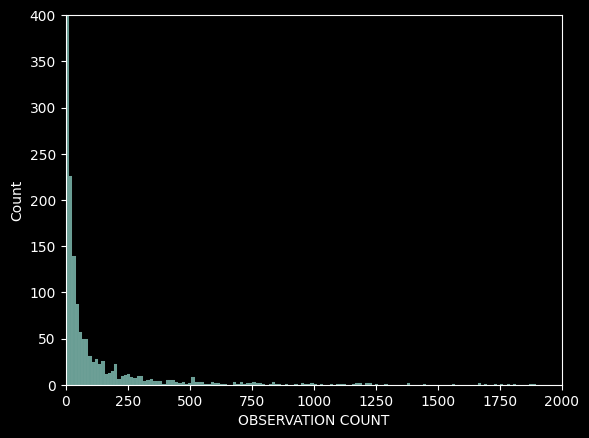

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(cranedata["OBSERVATION COUNT"])
plt.axis([0,2000,0,400])

Obvious skew. Most of the sightings are single ammounts of the bird

<h1> POPULATION DATA COMPARISON

In [15]:
popdata=popdata.groupby(["Country","Year"])["Population"].mean()
#popdata.get_group() #to access individual rows
popdata = pd.DataFrame(popdata)
popdata

Population
Country     Year            
Afghanistan 1975  12185168.7
            1980  12516846.7
            1985  10548339.5
            1990  10733987.7
            1995  16453396.5
...                      ...
Zimbabwe    2000  11831511.7
            2005  12223233.2
            2010  12840998.2
            2015  14157998.4
            2020  15672870.9

[2500 rows x 1 columns]

In [16]:
popdata["Population"]["Afghanistan"]

Year
1975    12185168.7
1980    12516846.7
1985    10548339.5
1990    10733987.7
1995    16453396.5
2000    19574996.0
2005    24436927.0
2010    28208919.0
2015    33760564.5
2020    38965918.5
Name: Population, dtype: float64

In [17]:
popcranedata = cranedata.join(popdata,on=["COUNTRY","OBSERVATION DATE"],how="inner")
popcranedata


OBSERVATION COUNT   Population
COUNTRY       OBSERVATION DATE                                
Algeria       2015                            7.4   39544078.0
Armenia       2020                          300.0    2809013.8
Austria       1990                           14.0    7673512.7
              2000                            1.0    8005507.2
              2015                            2.2    8638698.0
...                                           ...          ...
United States 2015                            1.0  324648884.0
              2020                            1.0  335984980.0
Uzbekistan    2000                           17.0   25046918.5
              2015                           18.0   31080397.0
              2020                           23.4   33657252.0

[325 rows x 2 columns]

1845 before. 325 after. Not much overlapping years

<h2> SET LOWER BOUND YEAR HERE

In [18]:
LOWERBOUNDYEAR = 2000

popcranedata = popcranedata.reset_index()
popcranedata = popcranedata[popcranedata["OBSERVATION DATE"]>LOWERBOUNDYEAR]
popcranedata[popcranedata["OBSERVATION DATE"]>LOWERBOUNDYEAR]

,COUNTRY,OBSERVATION DATE,OBSERVATION COUNT,Population
0,Algeria,2015,7.400000,39544078.0
1,Armenia,2020,300.000000,2809013.8
4,Austria,2015,2.200000,8638698.0
5,Austria,2020,55.088235,8904211.0
6,Azerbaijan,2010,1.000000,9156878.2
...,...,...,...,...
319,United States,2010,1.000000,311222050.0
320,United States,2015,1.000000,324648884.0
321,United States,2020,1.000000,335984980.0
323,Uzbekistan,2015,18.000000,31080397.0


Earlier years had less observations due to less people, less technology, less effort etc. Number of observations has gone up over the year. The earlier data have small values of observations, skewing the data. Limiting the lower bound to a recent time will prevent this skew

In [19]:
limit = 3
countryduplicates = (popcranedata["COUNTRY"].value_counts()<=limit)[(popcranedata["COUNTRY"].value_counts()<=limit) == False]

popcranedata = popcranedata[popcranedata["COUNTRY"].isin(countryduplicates.index)]

In [20]:
popcranedata

,COUNTRY,OBSERVATION DATE,OBSERVATION COUNT,Population
14,Belgium,2005,7.000000,1.051637e+07
15,Belgium,2010,22.000000,1.087731e+07
16,Belgium,2015,1874.000000,1.124766e+07
17,Belgium,2020,68.342105,1.156092e+07
29,China,2005,1.714286,1.312364e+09
...,...,...,...,...
294,Tunisia,2020,31.200000,1.216244e+07
314,United Kingdom,2005,11.043478,6.038365e+07
315,United Kingdom,2010,2.818182,6.275998e+07
316,United Kingdom,2015,4.821429,6.522426e+07


Down to 142 entries after removing any entries with less than 5 entries

In [21]:
popcranedata["COUNTRY"].unique()

array(['Belgium', 'China', 'Cyprus', 'Denmark', 'Egypt', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Hungary', 'India', 'Israel', 'Italy', 'Japan', 'Lithuania',
       'Myanmar', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Russia',
       'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'Tunisia',
       'United Kingdom'], dtype=object)

In [22]:
popcranedata=popcranedata.set_index(["COUNTRY","OBSERVATION DATE"])

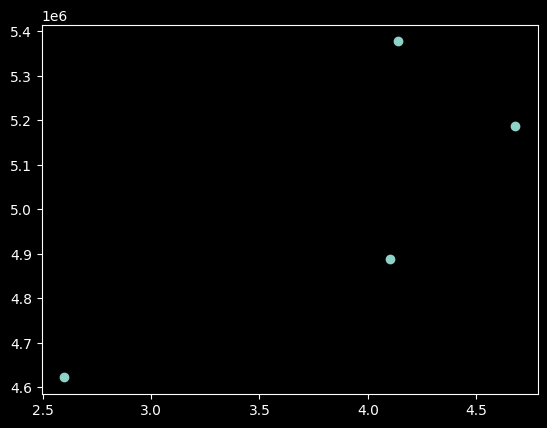

In [23]:
import matplotlib.pyplot as plt

#Example of norway
country = "Norway"
plt.scatter(popcranedata["OBSERVATION COUNT"][country],popcranedata["Population"][country])

In [24]:
corrs = popcranedata.reset_index()[["COUNTRY","OBSERVATION COUNT","Population"]].groupby("COUNTRY").corr()
corrs = corrs.reset_index().drop(["level_1","OBSERVATION COUNT"],axis=1)
corrs = corrs[corrs["Population"]!=1]
corrs.columns = pd.Index(["Country","Correlation"])
corrs

,Country,Correlation
0,Belgium,0.317128
2,China,0.672744
4,Cyprus,-0.942297
6,Denmark,-0.579189
8,Egypt,0.951784
10,Estonia,0.901485
12,Ethiopia,0.363715
14,Finland,0.172753
16,France,0.054909
18,Georgia,-0.634082


In [25]:
#Average difference for each country

#corrs.set_index("Country")[["Correlation"]].abs().sort_values("Correlation").head()
#corrs.sort_values("Correlation").head()
popcranedata_diff = popcranedata.reset_index()[["COUNTRY","OBSERVATION COUNT","Population"]].groupby("COUNTRY").diff()
popcranedata_diff["Country"] = popcranedata.reset_index()["COUNTRY"]
popcranedata_diff= popcranedata_diff.dropna()
popcranedata_diff["Crane Count per Population Change"]=popcranedata_diff["OBSERVATION COUNT"]/popcranedata_diff["Population"]
popcranechange = popcranedata_diff[["Crane Count per Population Change","Country"]].groupby("Country").mean()
popcranechange.sort_values("Crane Count per Population Change").round(5) * 1000000

,Crane Count per Population Change
Country,
Cyprus,-1030.0
Georgia,-500.0
Portugal,-410.0
Belgium,-240.0
Denmark,-130.0
Lithuania,-70.0
Italy,-50.0
Greece,-40.0
France,-40.0


In [26]:
popcranechange.mean() * 1000000

Crane Count per Population Change    236.807325
dtype: float64

In [27]:
print("Correlation Overall Absolute Average = ",round(corrs["Correlation"].abs().mean(),3))

Correlation Overall Absolute Average =  0.515


In [28]:
print("Average Negative Correlation = ",corrs[corrs["Correlation"]<0]["Correlation"].mean())

Average Negative Correlation =  -0.5107506092210233


In [29]:
print("Average Positive Correlation = ",corrs[corrs["Correlation"]>0]["Correlation"].mean())

Average Positive Correlation =  0.5180421759299425


INSERT HYPOTHESIS TEST HERE

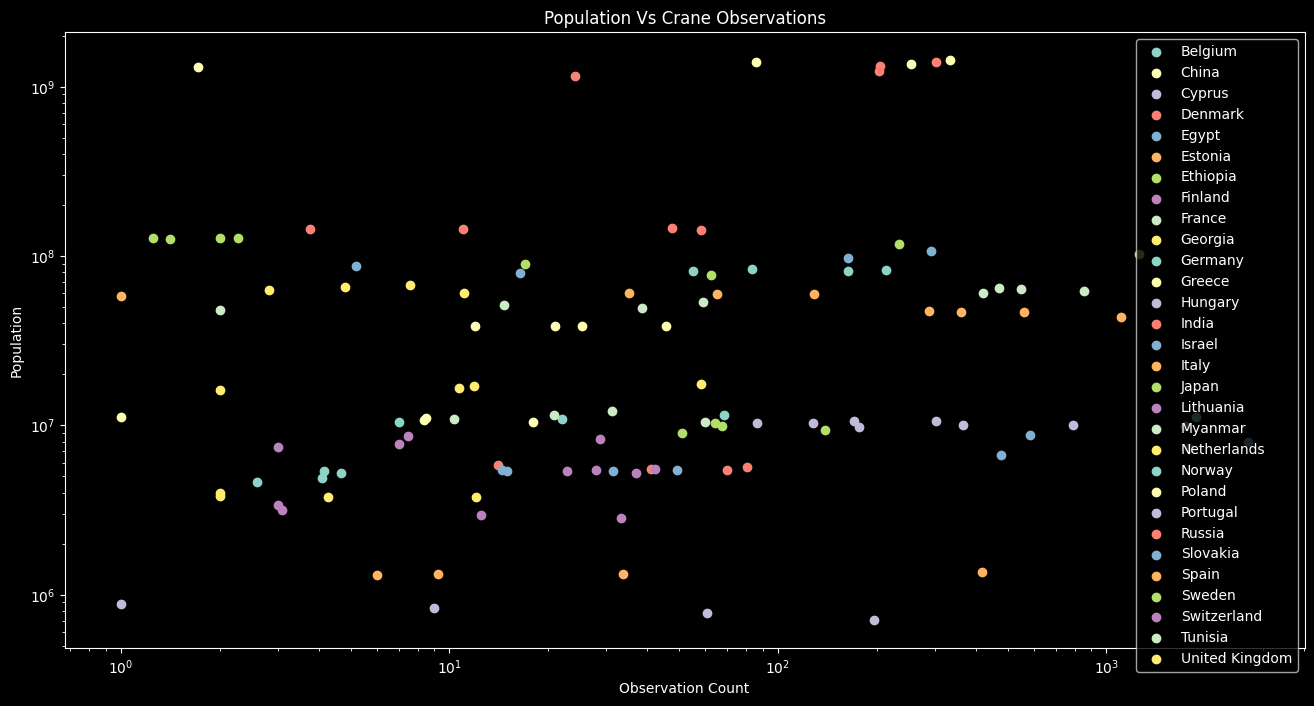

In [30]:
plt.figure(figsize=(16,8))

plt.xlabel("Observation Count")
plt.ylabel("Population")
plt.yscale("log")
plt.xscale("log")
plt.title("Population Vs Crane Observations")
for i in popcranedata.reset_index()["COUNTRY"].unique():
    plt.scatter(popcranedata["OBSERVATION COUNT"][i],popcranedata["Population"][i])

plt.legend(popcranedata.reset_index()["COUNTRY"].unique())

C:\Users\prabr\AppData\Local\Temp\ipykernel_23980\2376417505.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = (popcranedata.groupby(pd.cut(popcranedata['Population'], list(range(int(popcranedata["Population"].min()),300706222,10000000)))).sum()).drop(columns="Population").reset_index()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, '(706222, 10706222]'),
  Text(1, 0, '(10706222, 20706222]'),
  Text(2, 0, '(20706222, 30706222]'),
  Text(3, 0, '(30706222, 40706222]'),
  Text(4, 0, '(40706222, 50706222]'),
  Text(5, 0, '(50706222, 60706222]'),
  Text(6, 0, '(60706222, 70706222]'),
  Text(7, 0, '(70706222, 80706222]'),
  Text(8, 0, '(80706222, 90706222]'),
  Text(9, 0, '(90706222, 100706222]'),
  Text(10, 0, '(100706222, 110706222]'),
  Text(11, 0, '(110706222, 120706222]'),
  Text(12, 0, '(120706222, 130706222]'),
  Text(13, 0, '(130706222, 140706222]'),
  Text(14, 0, '(140706222, 150706222]'),
  Text(15, 0, '(150706222, 160706222]'),
  Text(16, 0, '(160706222, 170706222]'),
  Text(17, 0, '(170706222, 180706222]'),
  Text(18, 0, '(180706222, 190706222]'),
  Text(19, 0, '(190706222, 200706222]'),
  Text(20, 0, '(200706222, 210706222]'),
  Tex

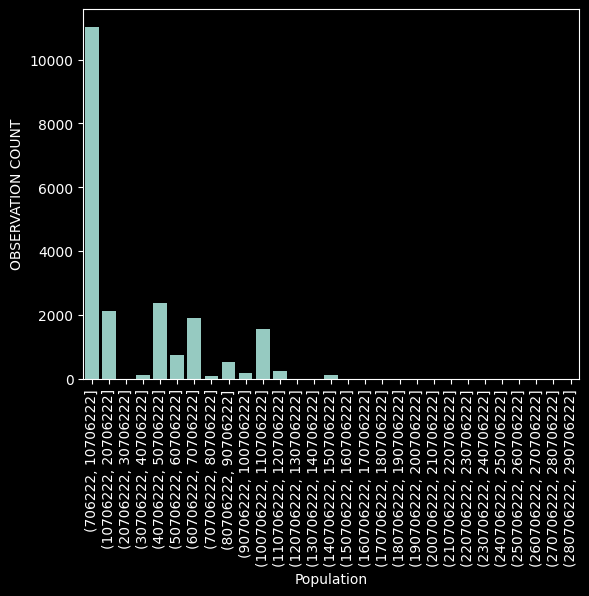

In [31]:
grouped = (popcranedata.groupby(pd.cut(popcranedata['Population'], list(range(int(popcranedata["Population"].min()),300706222,10000000)))).sum()).drop(columns="Population").reset_index()

sns.barplot(data=grouped,x="Population",y="OBSERVATION COUNT")
plt.xticks(rotation=90)

obvious downtrend

C:\Users\prabr\AppData\Local\Temp\ipykernel_23980\4242091779.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = (popcranedata.groupby(pd.cut(popcranedata['Population'], list(range(10706222,300706222,1000000)))).sum()).drop(columns="Population").reset_index()


(np.float64(0.0), np.float64(200.0), np.float64(0.0), np.float64(2000.0))

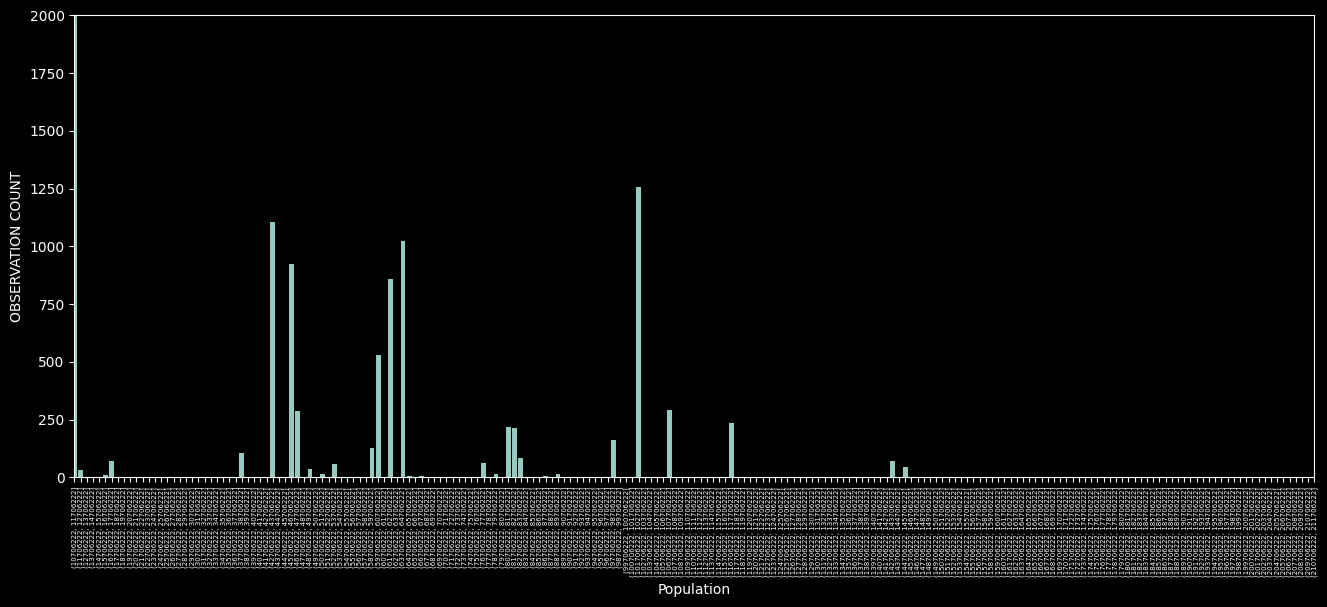

In [32]:
grouped = (popcranedata.groupby(pd.cut(popcranedata['Population'], list(range(10706222,300706222,1000000)))).sum()).drop(columns="Population").reset_index()

plt.figure(figsize=(16,6))
plt.xticks(rotation=90,size=5)
sns.barplot(data=grouped,x="Population",y="OBSERVATION COUNT")
plt.axis([0,200,0,2000])

no obvious trend

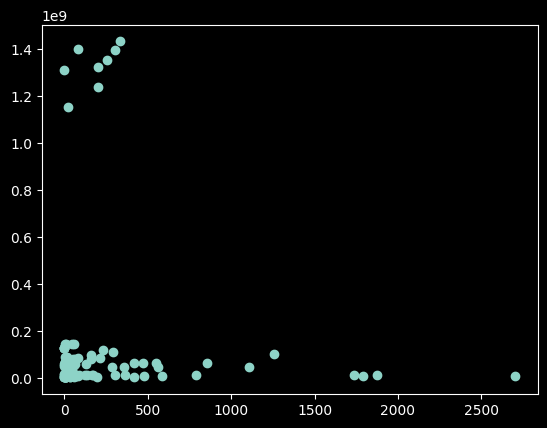

In [33]:
plt.scatter(popcranedata[["OBSERVATION COUNT"]].values,popcranedata[["Population"]].values)

somethings going on here, not quite a linear correlation

chunk of high population crane data at low human population


C:\Users\prabr\AppData\Local\Temp\ipykernel_23980\3583417104.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


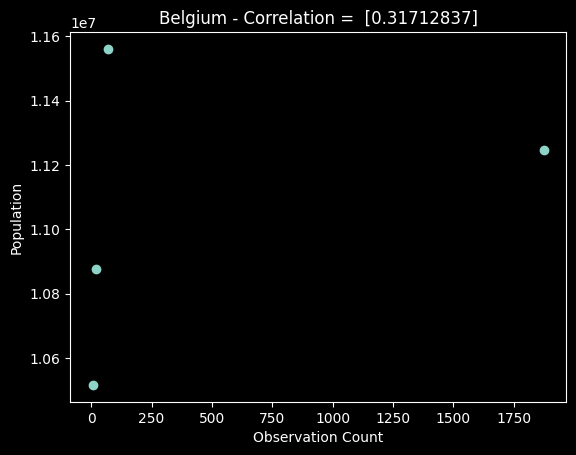

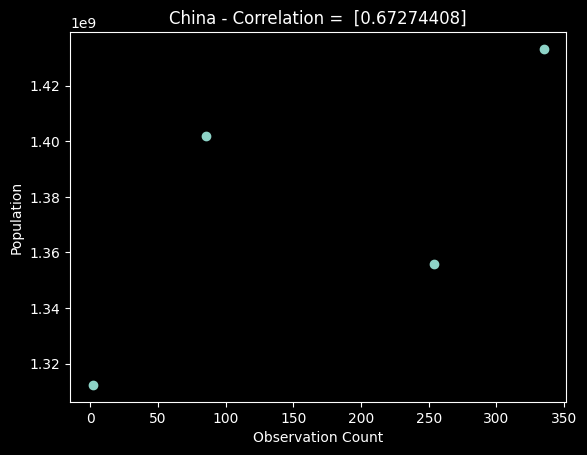

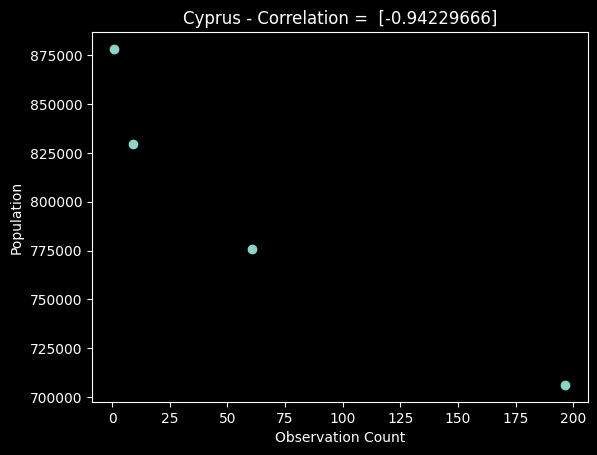

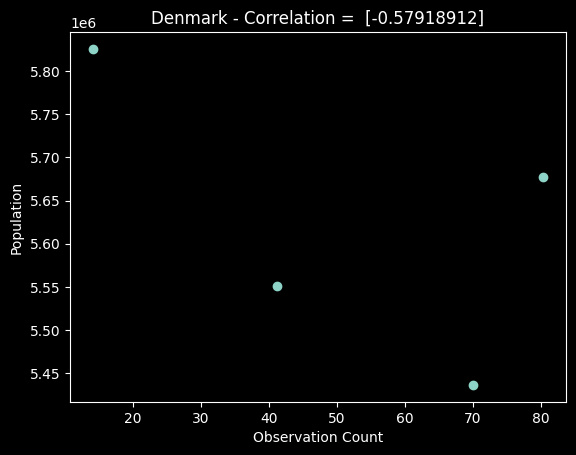

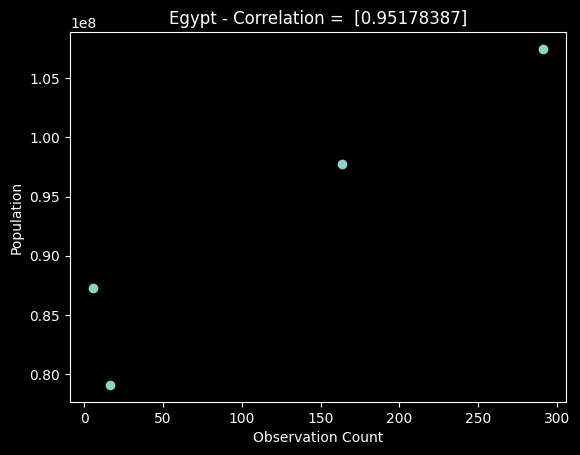

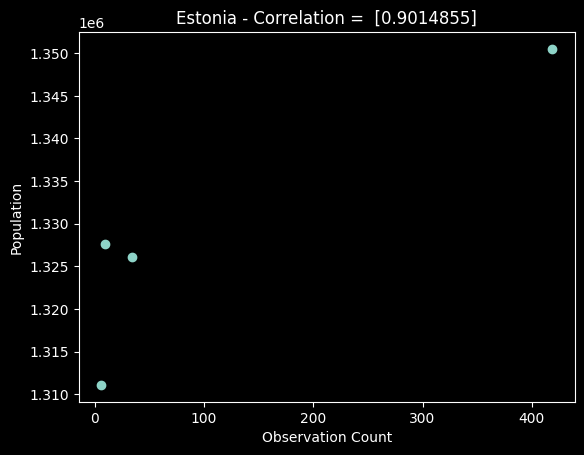

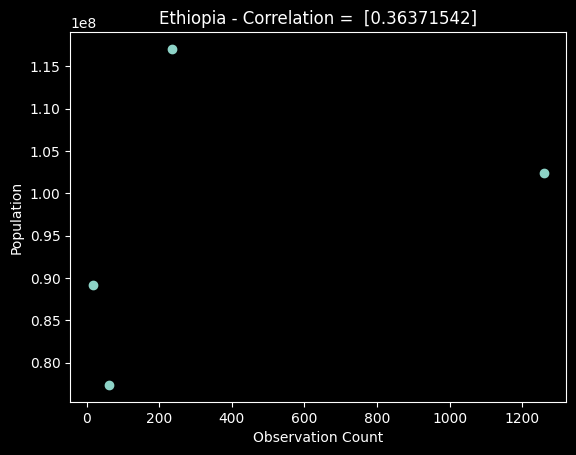

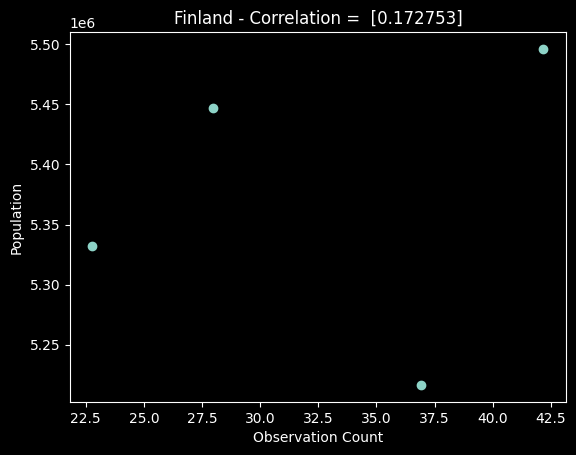

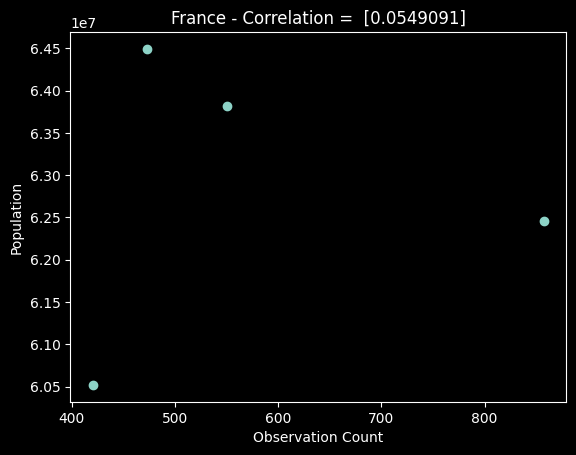

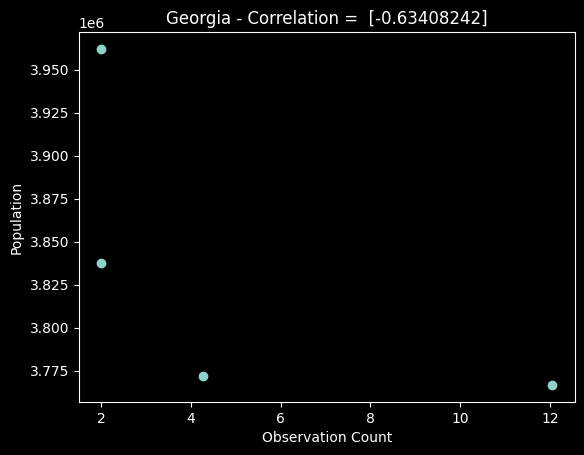

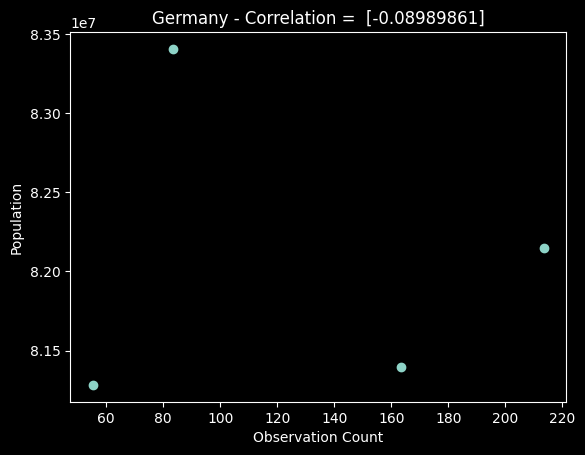

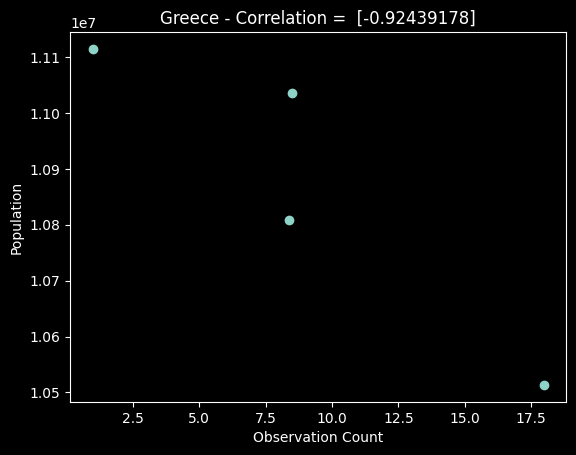

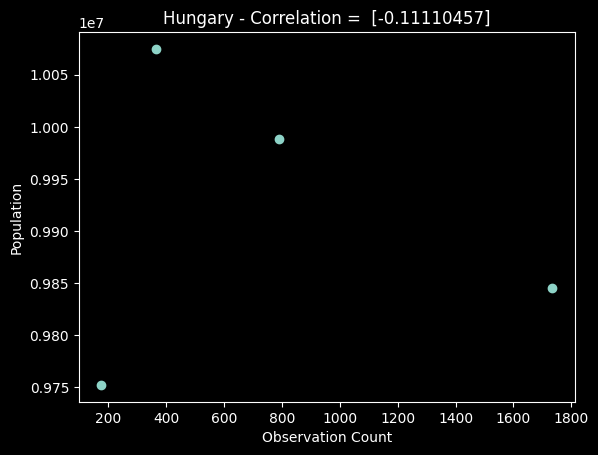

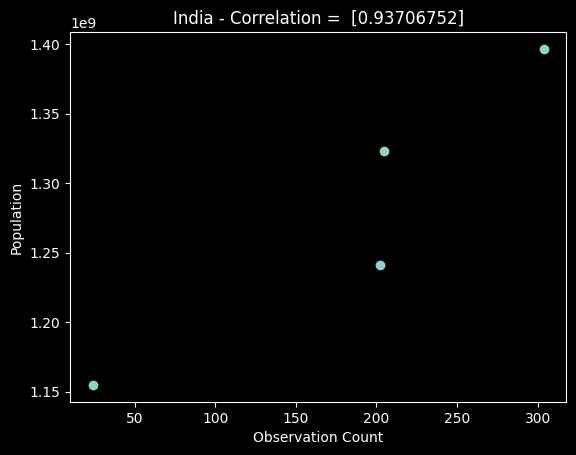

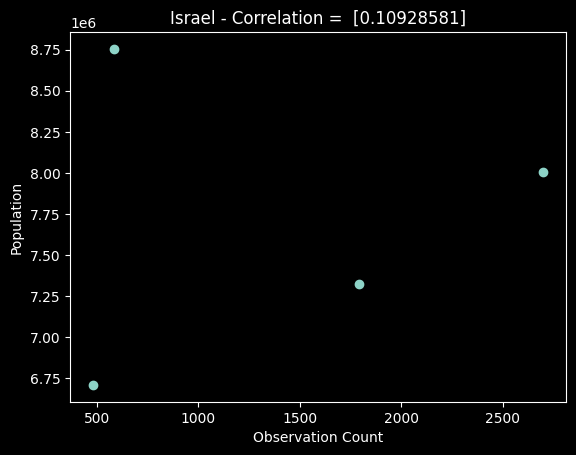

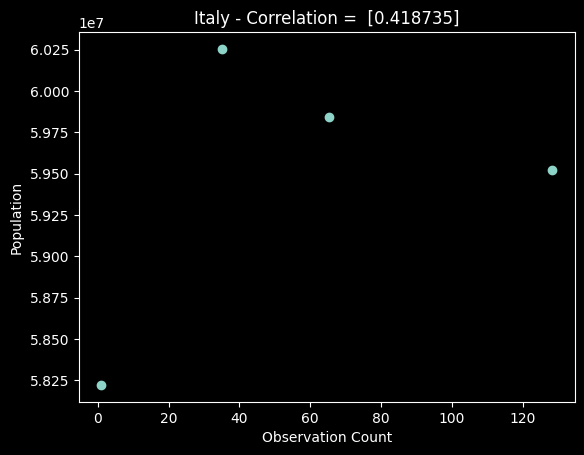

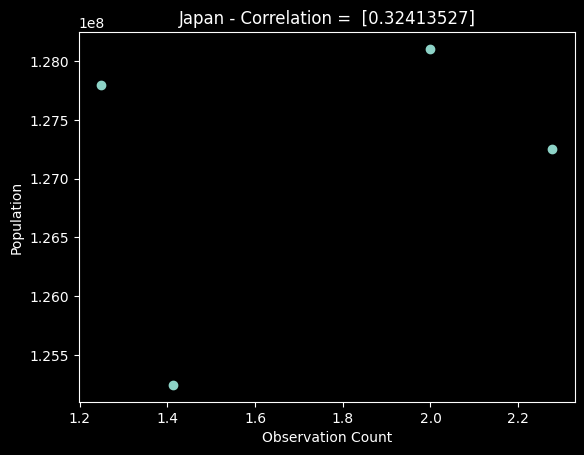

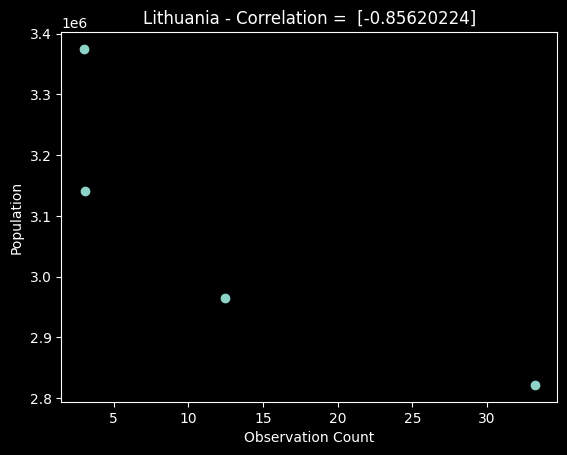

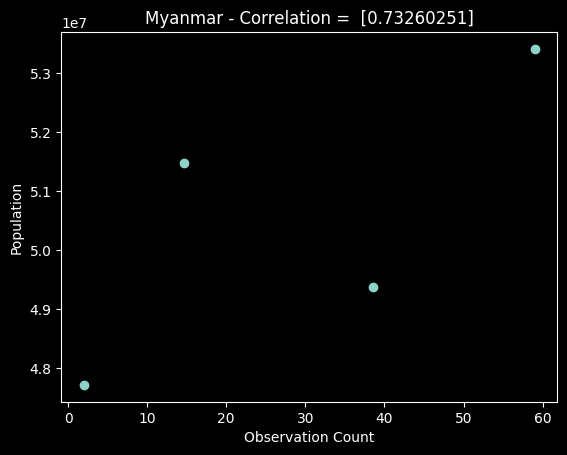

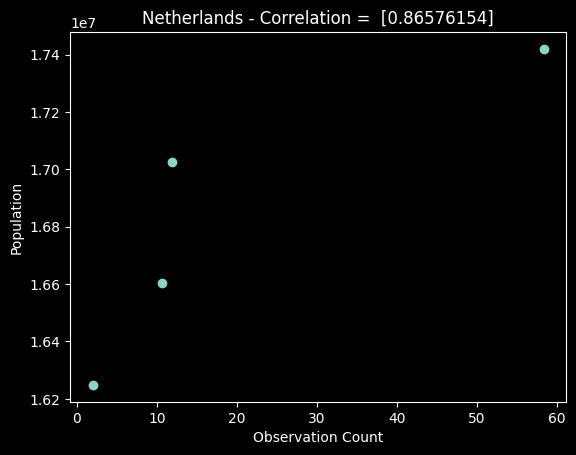

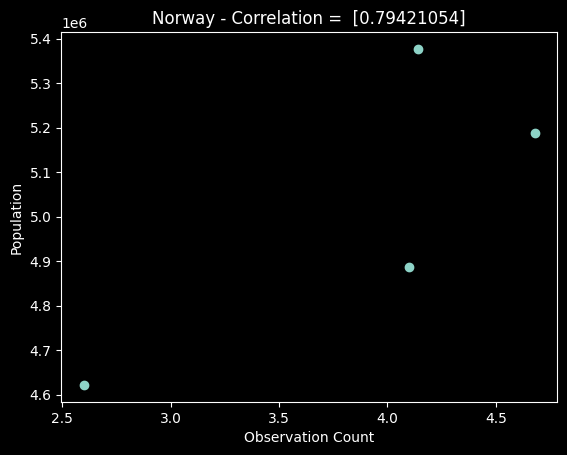

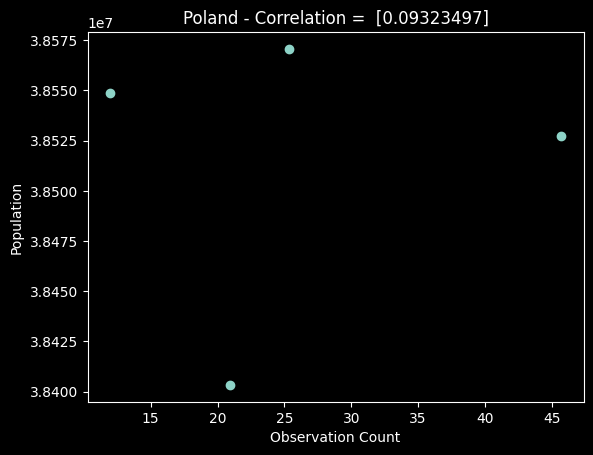

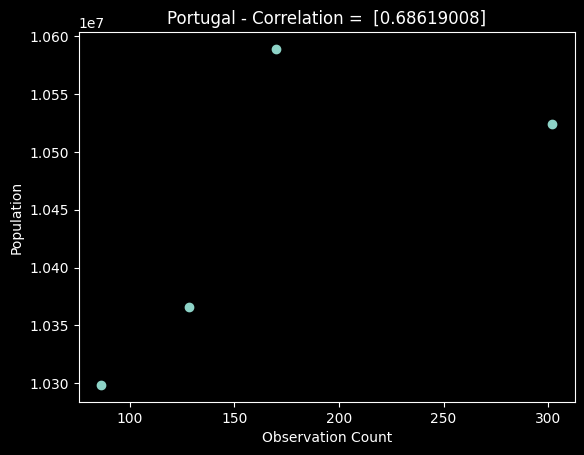

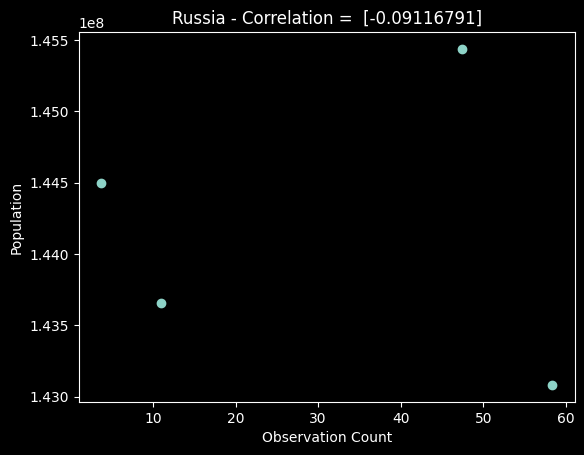

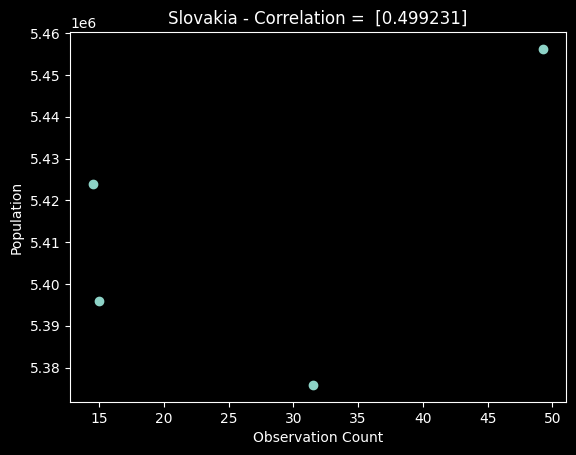

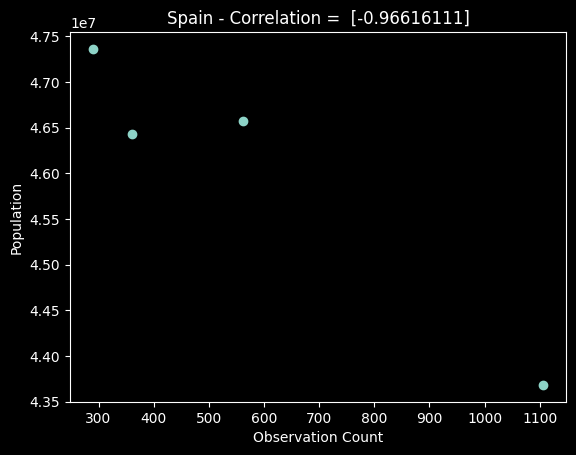

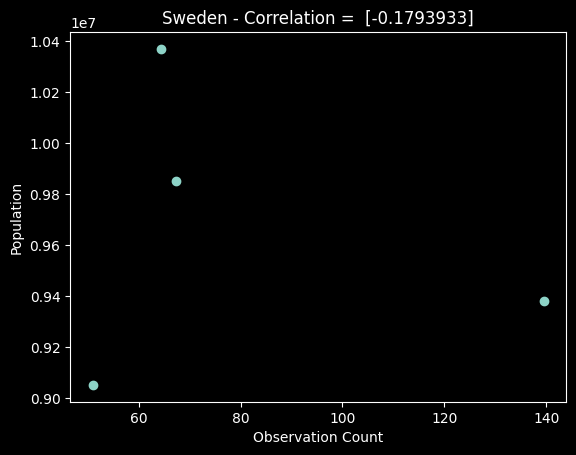

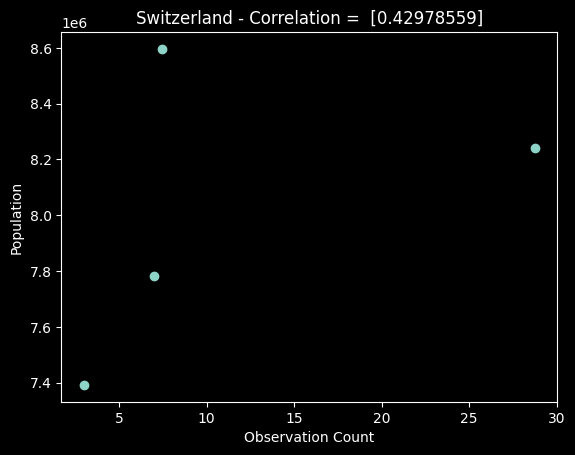

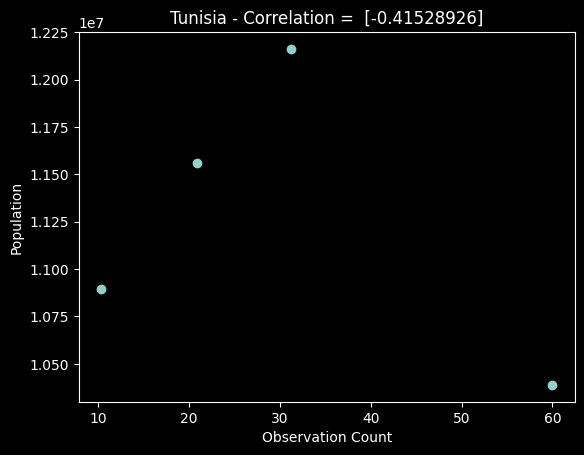

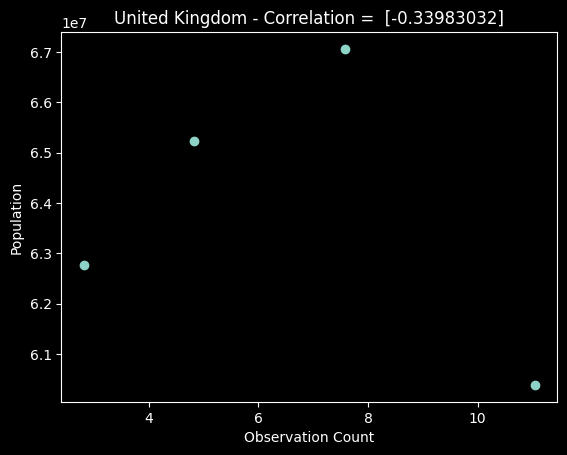

In [34]:
for i in popcranedata.reset_index()["COUNTRY"].unique():
    plt.figure()
    correlationfig = corrs[corrs["Country"]==i]["Correlation"]
    plt.title(i + " - Correlation =  " + f"{correlationfig.values}")
    plt.xlabel("Observation Count")
    plt.ylabel("Population")
    plt.scatter(popcranedata["OBSERVATION COUNT"][i],popcranedata["Population"][i])
    

Text(0, 0.5, 'Normalized Value')

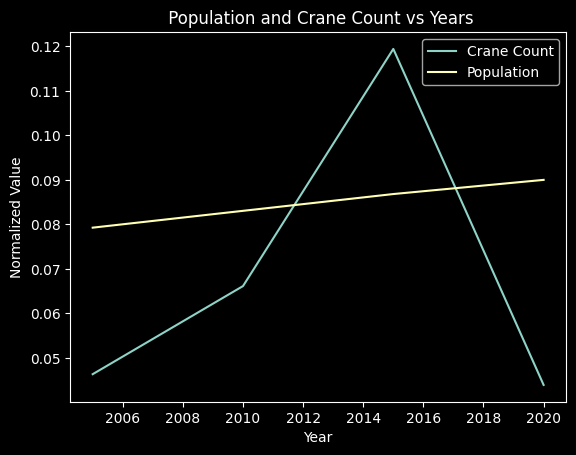

In [35]:
#Normalized the values to fit on the graph
plt.plot(popcranedata.reset_index()[["OBSERVATION DATE","OBSERVATION COUNT","Population"]].groupby("OBSERVATION DATE").mean()["OBSERVATION COUNT"]/popcranedata["OBSERVATION COUNT"].max(),label="Crane Count")
plt.plot(popcranedata.reset_index()[["OBSERVATION DATE","OBSERVATION COUNT","Population"]].groupby("OBSERVATION DATE").mean()["Population"]/popcranedata["Population"].max(),label="Population")
plt.legend()
plt.title(" Population and Crane Count vs Years")
plt.xlabel("Year")
plt.ylabel("Normalized Value")

In [36]:
popcranedata.reset_index()

,COUNTRY,OBSERVATION DATE,OBSERVATION COUNT,Population
0,Belgium,2005,7.000000,1.051637e+07
1,Belgium,2010,22.000000,1.087731e+07
2,Belgium,2015,1874.000000,1.124766e+07
3,Belgium,2020,68.342105,1.156092e+07
4,China,2005,1.714286,1.312364e+09
...,...,...,...,...
115,Tunisia,2020,31.200000,1.216244e+07
116,United Kingdom,2005,11.043478,6.038365e+07
117,United Kingdom,2010,2.818182,6.275998e+07
118,United Kingdom,2015,4.821429,6.522426e+07


In [37]:
popcranedata.reset_index().set_index("OBSERVATION DATE")["OBSERVATION COUNT"]

OBSERVATION DATE
2005       7.000000
2010      22.000000
2015    1874.000000
2020      68.342105
2005       1.714286
           ...     
2020      31.200000
2005      11.043478
2010       2.818182
2015       4.821429
2020       7.579787
Name: OBSERVATION COUNT, Length: 120, dtype: float64

<h3> FLIGHT DATA

In [38]:

flightdata = flightdata[flightdata["Year"]>LOWERBOUNDYEAR]

In [39]:
flightdata = flightdata.set_index(["Country Name","Year"])

In [40]:
popdata

Population
Country     Year            
Afghanistan 1975  12185168.7
            1980  12516846.7
            1985  10548339.5
            1990  10733987.7
            1995  16453396.5
...                      ...
Zimbabwe    2000  11831511.7
            2005  12223233.2
            2010  12840998.2
            2015  14157998.4
            2020  15672870.9

[2500 rows x 1 columns]

In [41]:
flightcranedata = cranedata.join(flightdata,on=["COUNTRY","OBSERVATION DATE"],how="inner")
flightcranedata = flightcranedata.reset_index()

In [42]:
limit = 5
countryduplicates = (flightcranedata["COUNTRY"].value_counts()<=limit)[(flightcranedata["COUNTRY"].value_counts()<=limit) == False]

flightcranedata = flightcranedata[flightcranedata["COUNTRY"].isin(countryduplicates.index)]

flightcranedata

,COUNTRY,OBSERVATION DATE,OBSERVATION COUNT,Flights
7,Austria,2001,1.000000,6550376.0
8,Austria,2002,1.000000,7070344.0
9,Austria,2003,3.000000,6902780.0
10,Austria,2006,2.000000,8785116.0
11,Austria,2007,1.500000,9140909.0
...,...,...,...,...
652,United Kingdom,2017,6.972826,151159067.0
653,United Kingdom,2018,7.869347,165388610.0
654,United Kingdom,2019,6.329268,142392528.0
655,United Kingdom,2020,7.579787,30237827.0


In [43]:
"""corrs = flightcranedata.reset_index()[["COUNTRY","OBSERVATION COUNT","Flights"]].groupby("COUNTRY").corr()
corrs = corrs.reset_index().drop(["level_1","OBSERVATION COUNT"],axis=1)
corrs = corrs[corrs["Flights"]!=1]
corrs.columns = pd.Index(["Country","Correlation"])
corrs = corrs.dropna()
"""

'corrs = flightcranedata.reset_index()[["COUNTRY","OBSERVATION COUNT","Flights"]].groupby("COUNTRY").corr()\ncorrs = corrs.reset_index().drop(["level_1","OBSERVATION COUNT"],axis=1)\ncorrs = corrs[corrs["Flights"]!=1]\ncorrs.columns = pd.Index(["Country","Correlation"])\ncorrs = corrs.dropna()\n'

In [44]:
"""print("Correlation Overall Absolute Average = ",round(corrs["Correlation"].abs().mean(),3))
print("Average Negative Correlation = ",corrs[corrs["Correlation"]<0]["Correlation"].mean())
print("Average Negative Correlation = ",corrs[corrs["Correlation"]<0]["Correlation"].mean())"""

'print("Correlation Overall Absolute Average = ",round(corrs["Correlation"].abs().mean(),3))\nprint("Average Negative Correlation = ",corrs[corrs["Correlation"]<0]["Correlation"].mean())\nprint("Average Negative Correlation = ",corrs[corrs["Correlation"]<0]["Correlation"].mean())'

In [45]:
flightcranedata = flightcranedata.set_index(["COUNTRY","OBSERVATION DATE"])


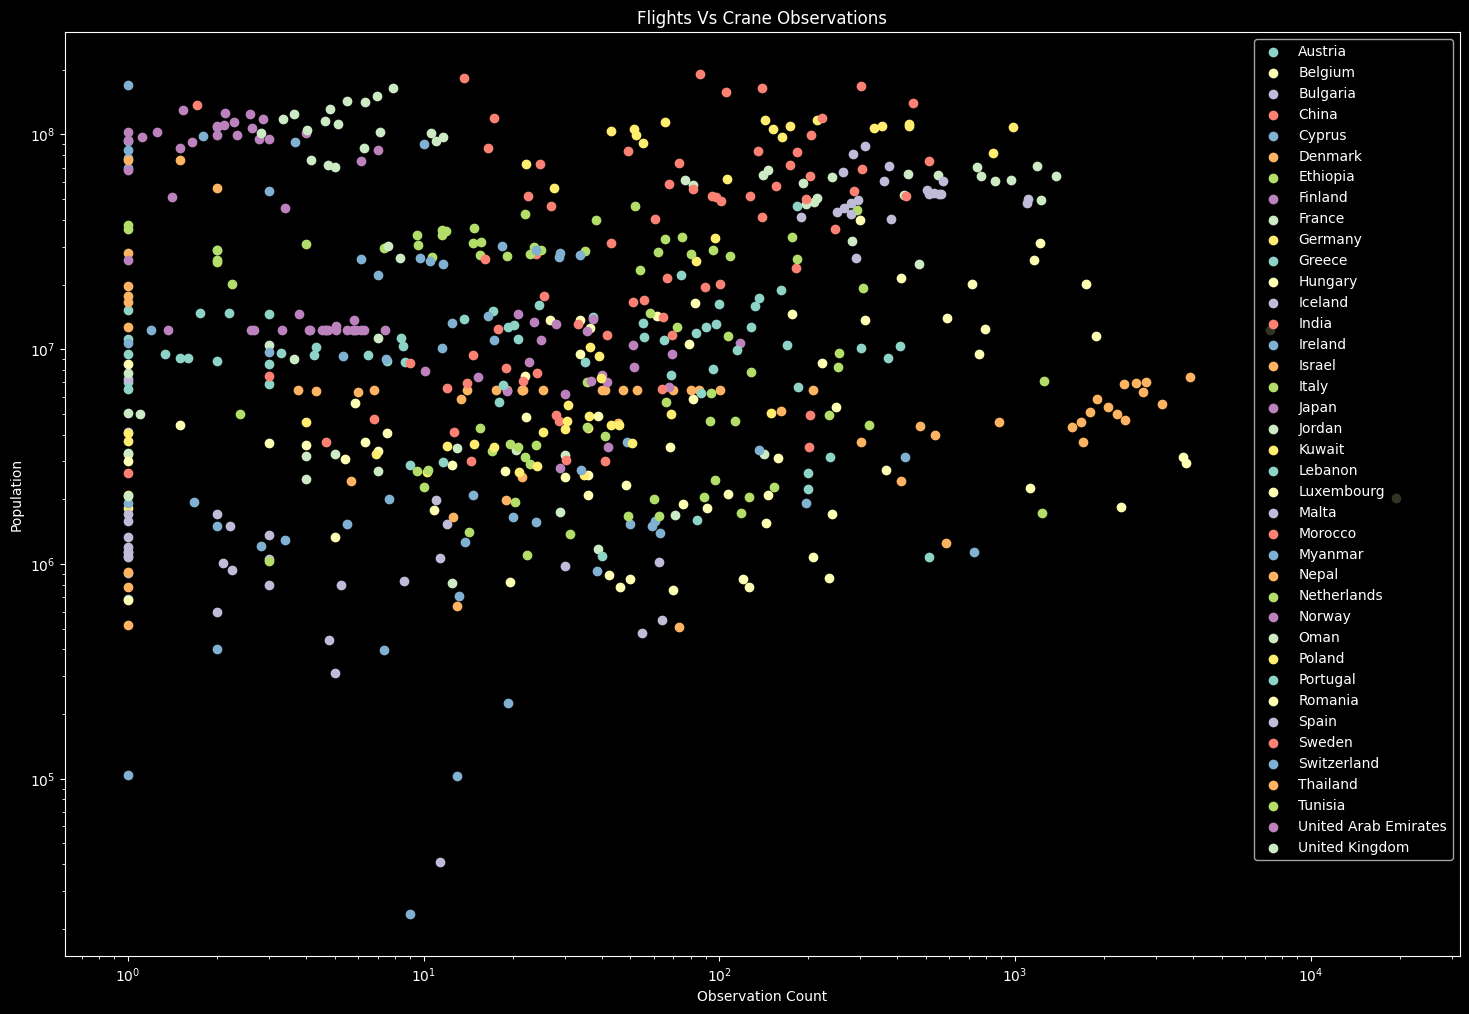

In [46]:

plt.figure(figsize=(18,12))

plt.xlabel("Observation Count")
plt.ylabel("Population")
plt.yscale("log")
plt.xscale("log")
plt.title("Flights Vs Crane Observations")
for i in flightcranedata.reset_index()["COUNTRY"].unique():
    plt.scatter(flightcranedata["OBSERVATION COUNT"][i],flightcranedata["Flights"][i])

plt.legend(flightcranedata.reset_index()["COUNTRY"].unique())

The data is skewed by ratings of 1 observation or low ammounts of observations and so does not really show an overall trend. 

There is enough data to use z score to remove outliers and reveal the overall trend without the skew.

Removing the skew will allow us to have a more accurate correlation. Instead of doing correlation near the start, it will be done after the data is cleaned

In [47]:

flightcranedata=flightcranedata.reset_index()


C:\Users\prabr\AppData\Local\Temp\ipykernel_23980\914267753.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


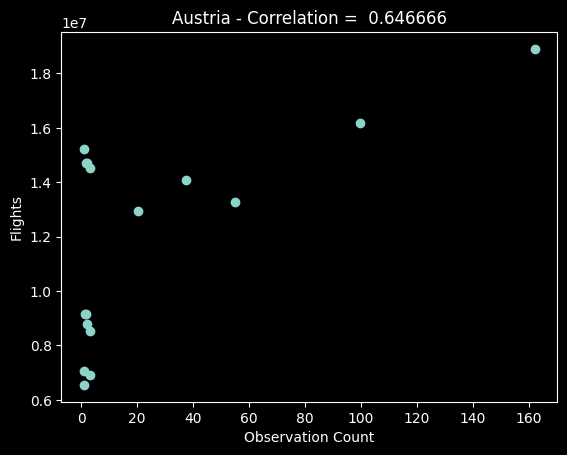

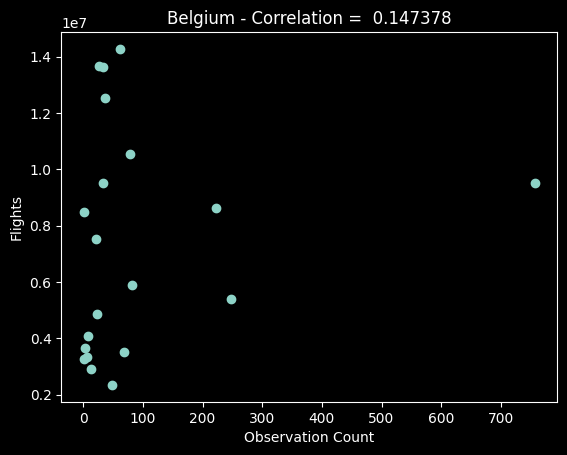

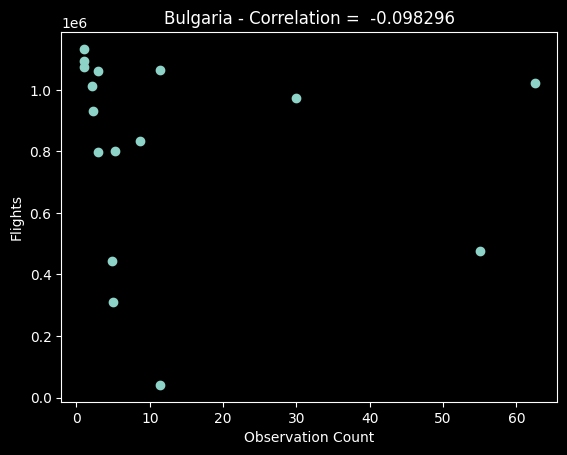

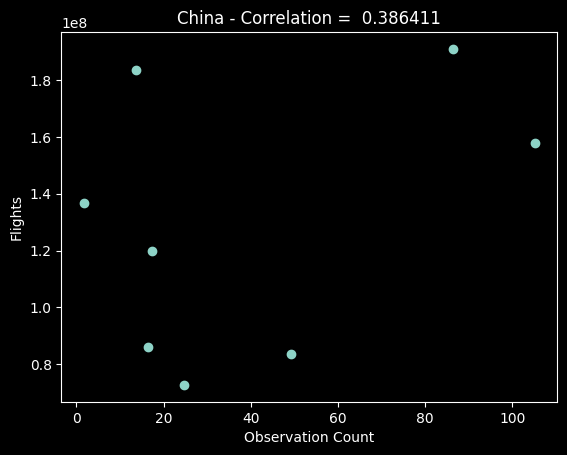

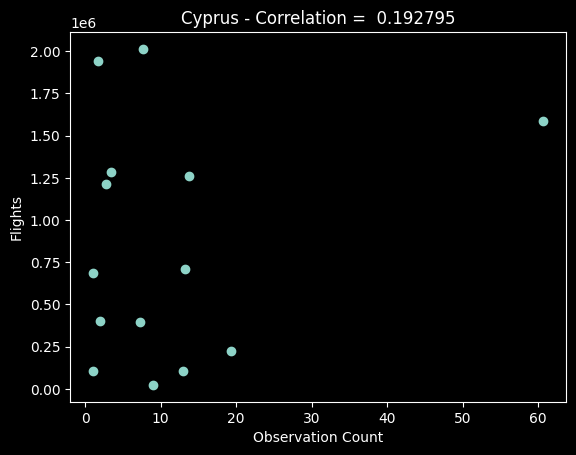

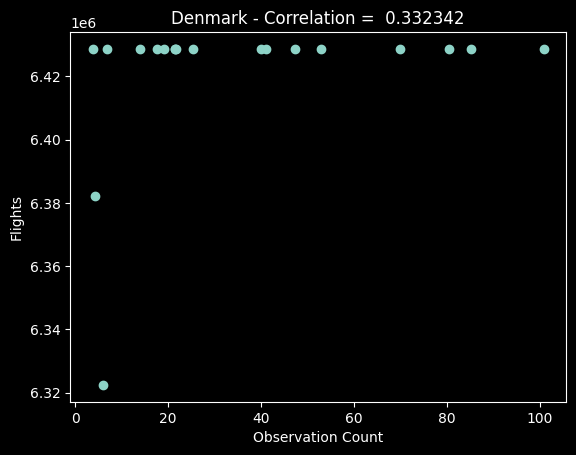

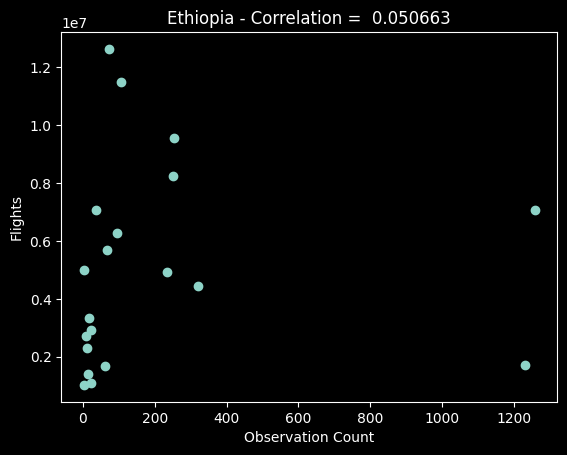

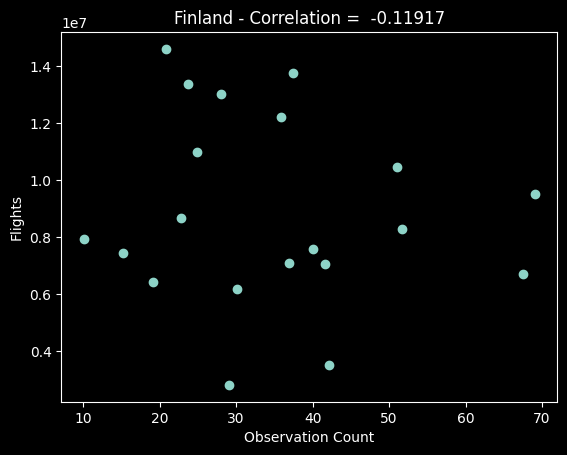

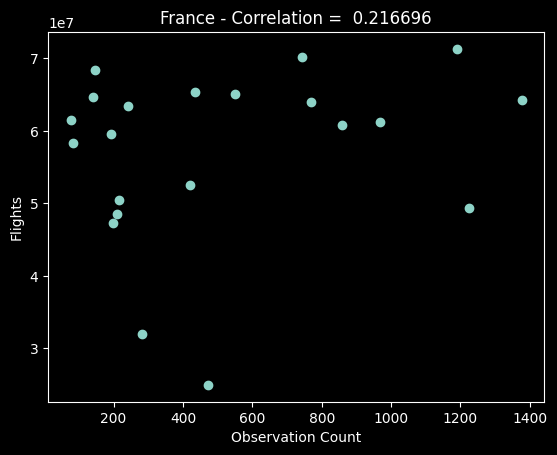

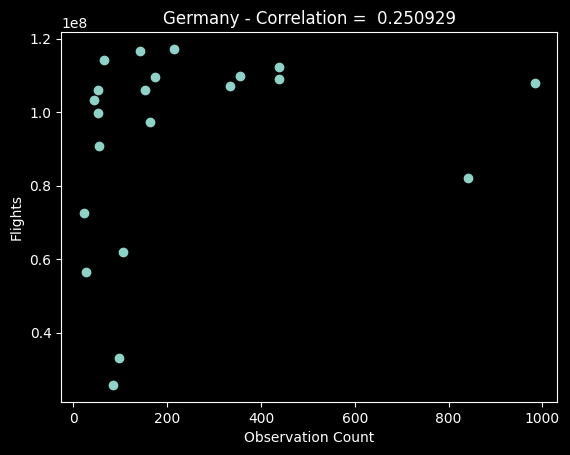

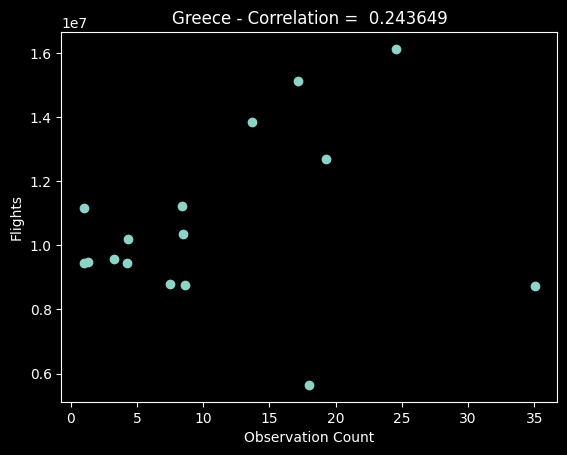

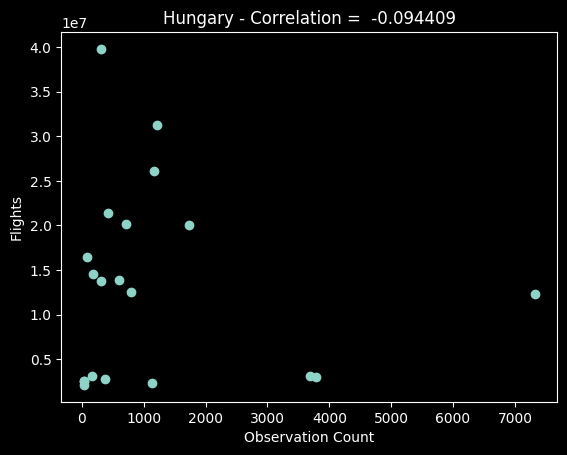

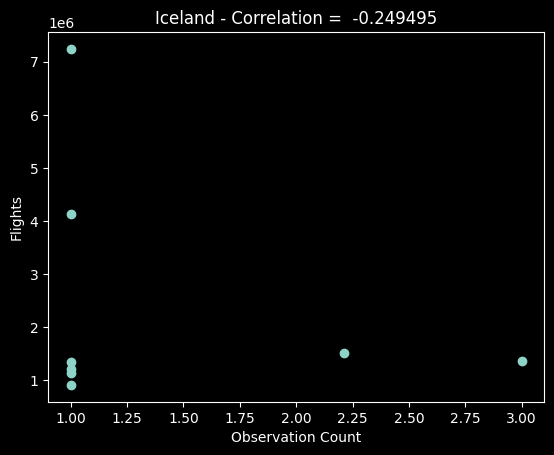

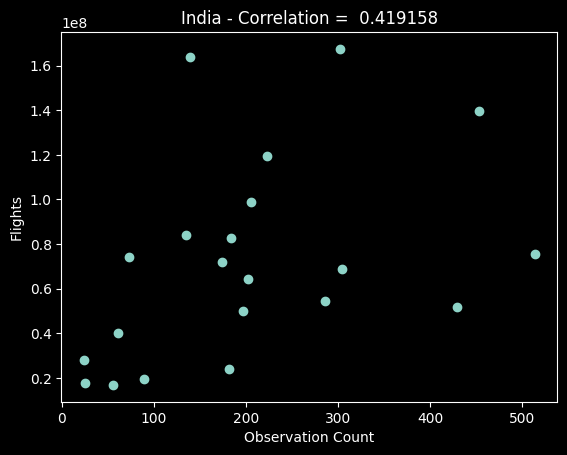

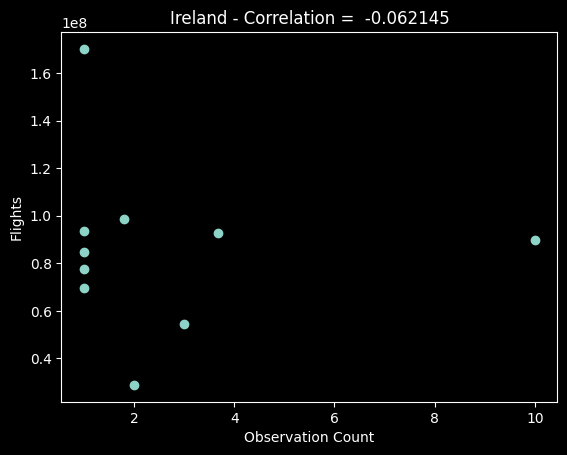

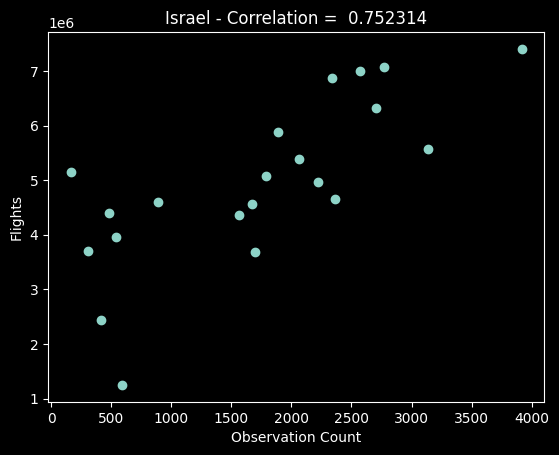

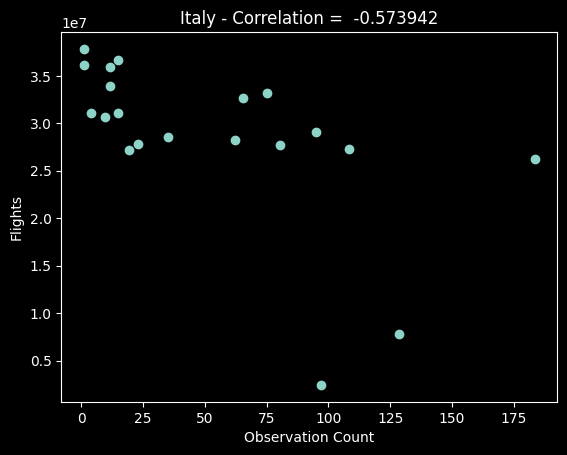

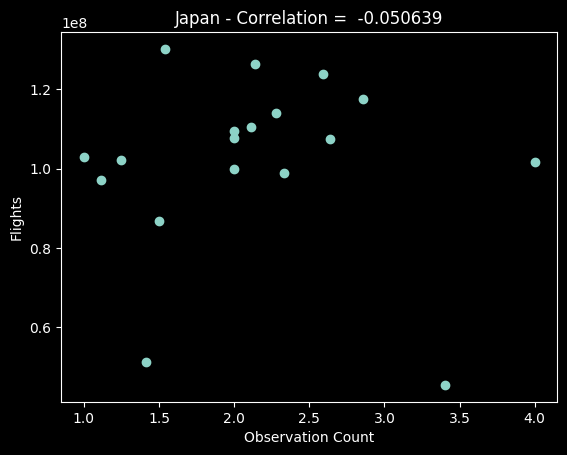

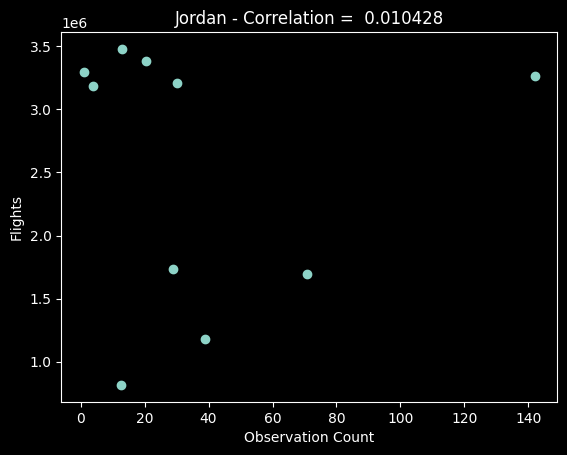

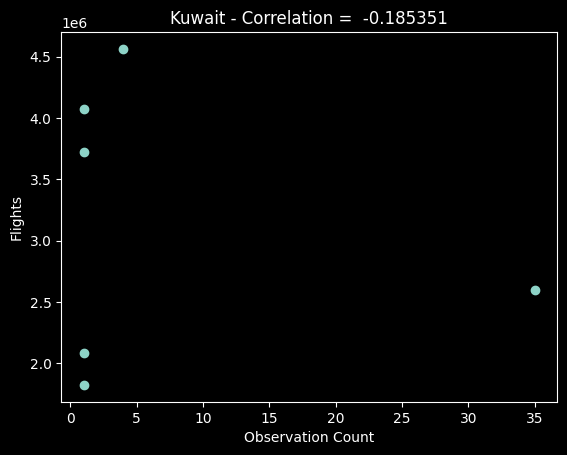

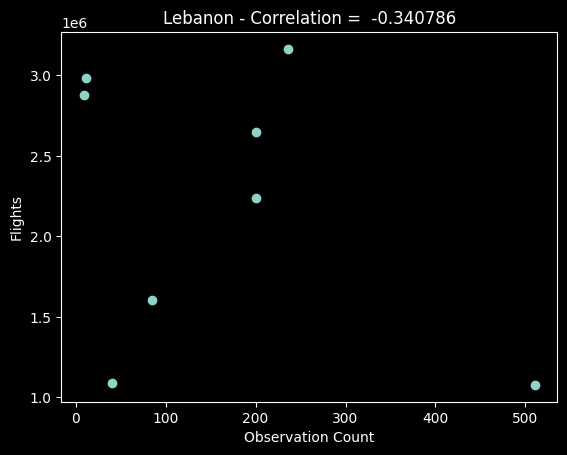

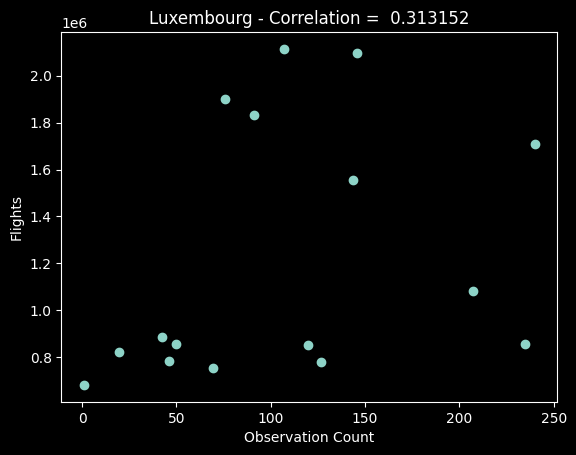

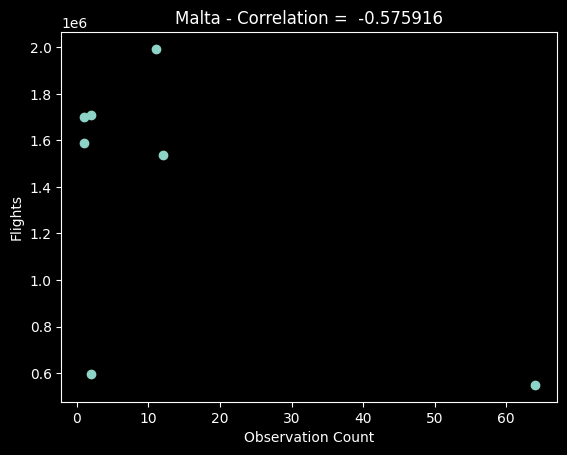

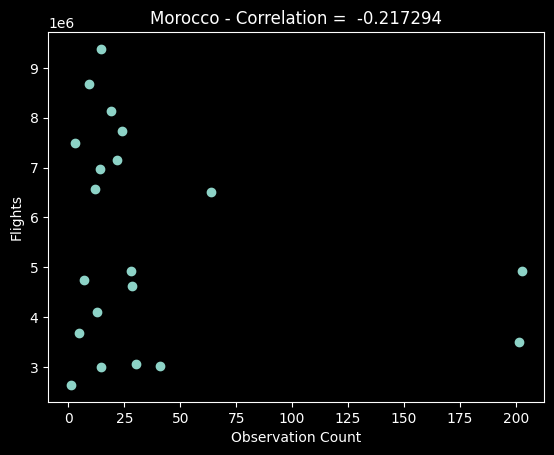

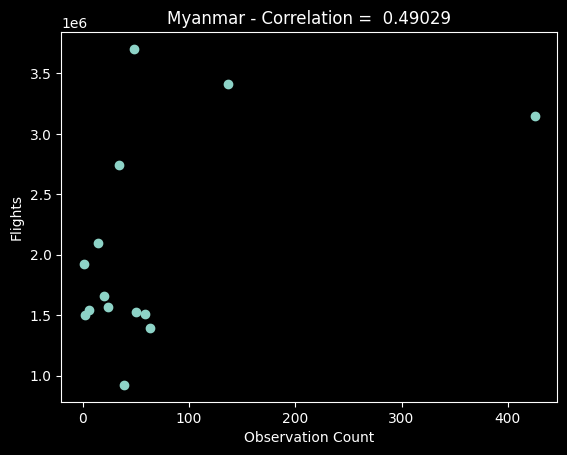

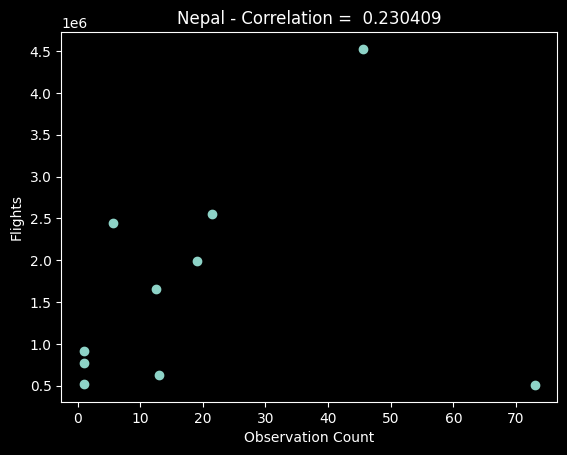

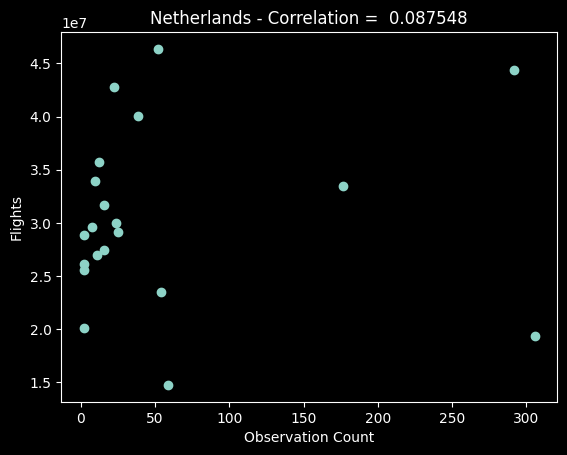

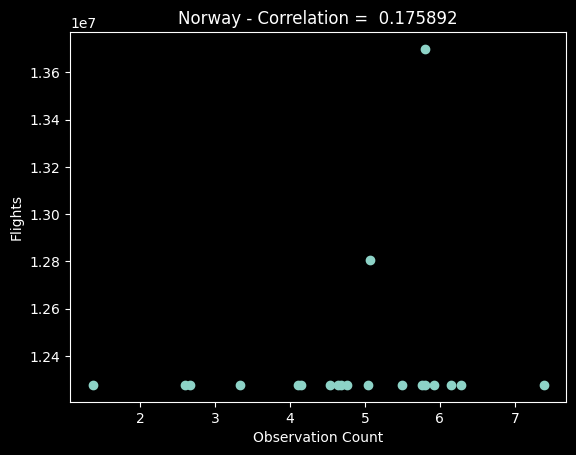

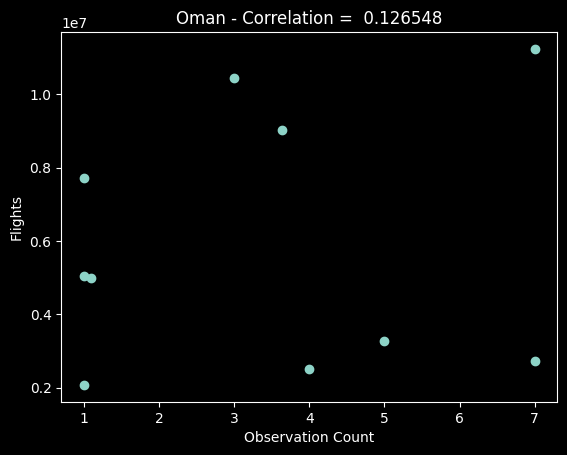

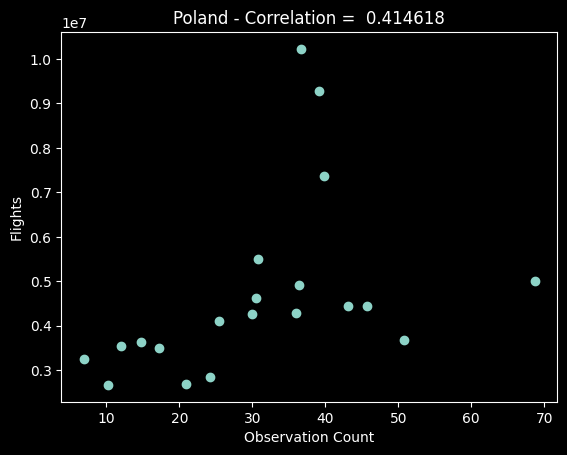

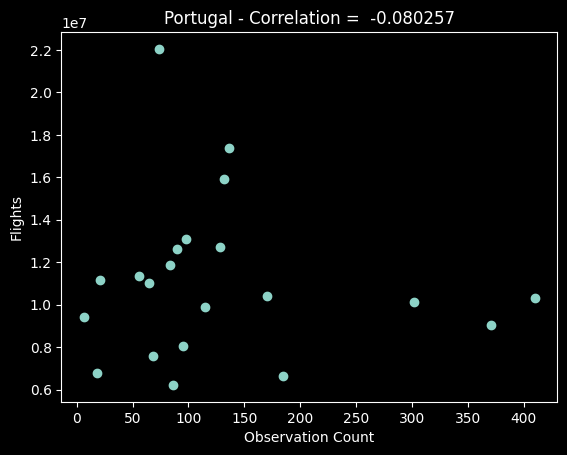

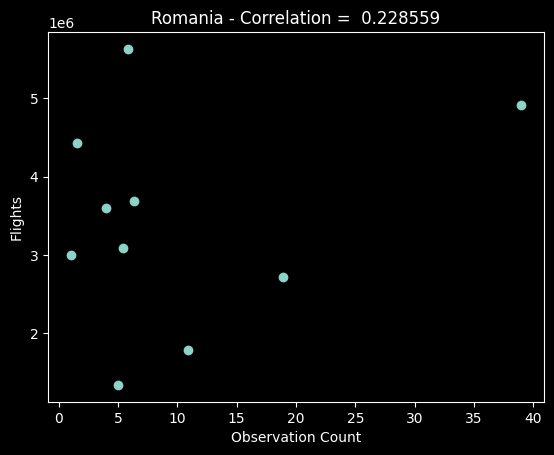

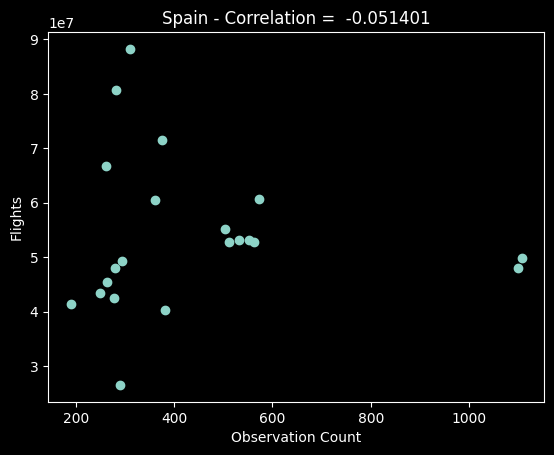

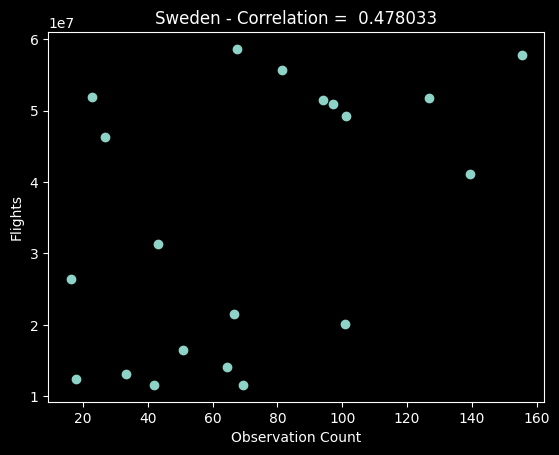

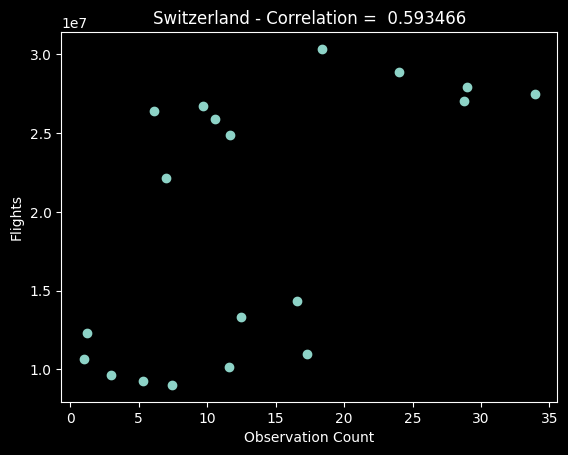

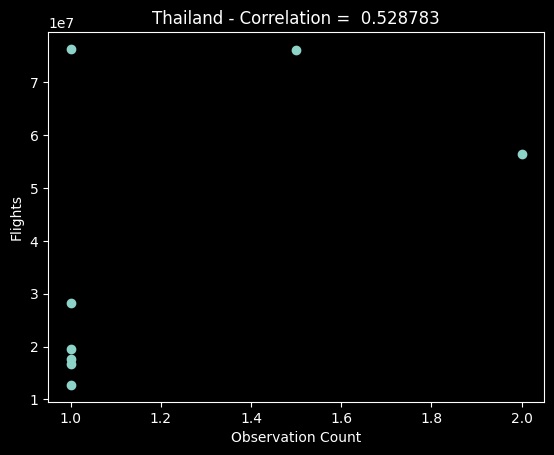

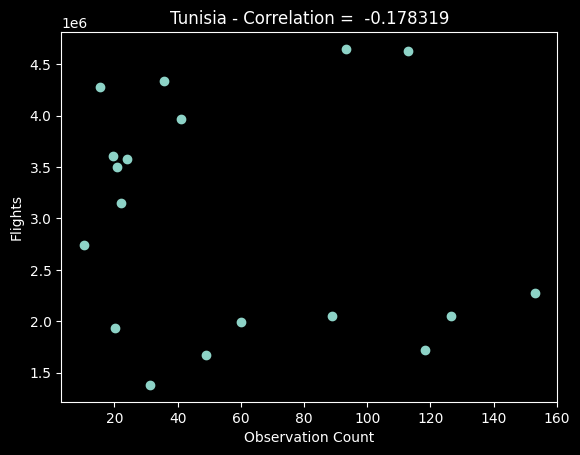

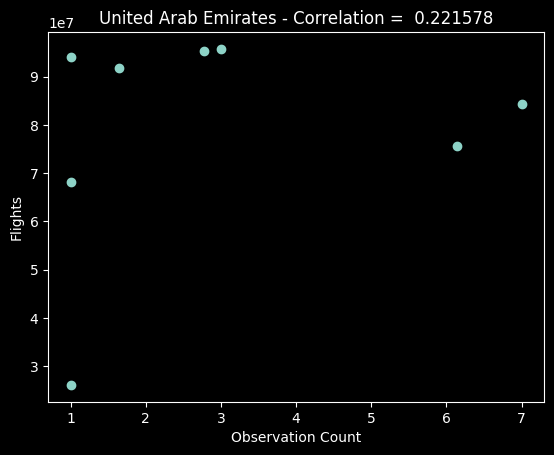

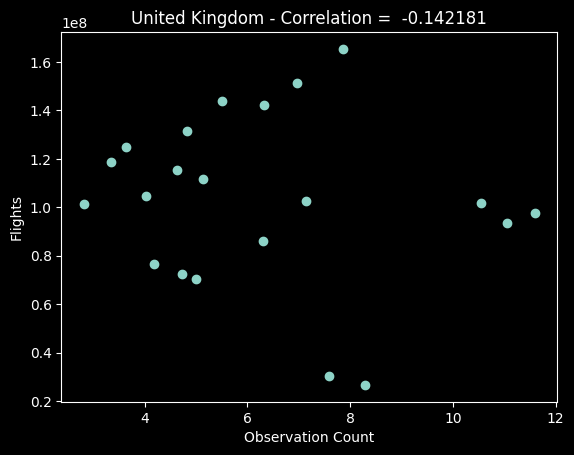

In [48]:
zscore = 3
upper_o = flightcranedata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").mean()+zscore*flightcranedata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").std()
lower_o = flightcranedata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").mean()-zscore*flightcranedata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").std()
upper_f = flightcranedata[["COUNTRY","Flights"]].groupby("COUNTRY").mean()+zscore*flightcranedata[["COUNTRY","Flights"]].groupby("COUNTRY").std()
lower_f = flightcranedata[["COUNTRY","Flights"]].groupby("COUNTRY").mean()-zscore*flightcranedata[["COUNTRY","Flights"]].groupby("COUNTRY").std()

corr = {}

for i in flightcranedata.reset_index()["COUNTRY"].unique():
    plt.figure()
    
    temp = flightcranedata[(flightcranedata["COUNTRY"]==i) &
    (flightcranedata["OBSERVATION COUNT"]<=upper_o["OBSERVATION COUNT"][i]) &
    (flightcranedata["OBSERVATION COUNT"]>=lower_o["OBSERVATION COUNT"][i]) &
    (flightcranedata["Flights"]<=upper_f["Flights"][i]) &
    (flightcranedata["Flights"]>=lower_f["Flights"][i])]

    corr[temp["COUNTRY"].iloc[1]]=round((temp[["OBSERVATION COUNT","Flights"]].corr())[(temp[["OBSERVATION COUNT","Flights"]].corr())["Flights"]!=1]["Flights"]["OBSERVATION COUNT"],6)

    correlationfig = corr[i]
    plt.title(i + " - Correlation =  " + f"{correlationfig}")
    plt.xlabel("Observation Count")
    plt.ylabel("Flights")

    plt.scatter(temp["OBSERVATION COUNT"],temp["Flights"])
    

In [49]:
corr = pd.DataFrame(corr.items())
corr.columns = pd.Index(["Country","Correlation"])

In [50]:
from IPython.display import display
print("Correlation Overall Absolute Average = ",round(corr["Correlation"].abs().mean(),3))
print("Average Negative Correlation = ",corr[corr["Correlation"]<0]["Correlation"].mean())
print("Average Negative Correlation = ",corr[corr["Correlation"]<0]["Correlation"].mean())
#display(corr.sort_values("Correlation",ascending=False).head())
display(corr["Correlation"].mean())

Correlation Overall Absolute Average =  0.271
Average Negative Correlation =  -0.20130673333333332
Average Negative Correlation =  -0.20130673333333332


np.float64(0.11586420512820514)

In [51]:
flightcranedata_diff=flightcranedata[["COUNTRY","OBSERVATION COUNT","Flights"]].groupby("COUNTRY").diff()
flightcranedata_diff["Country"] = flightcranedata.reset_index()["COUNTRY"]
flightcranedata_diff = flightcranedata_diff.dropna()
flightcranedata_diff["Crane Count per Flight Change"]=flightcranedata_diff["OBSERVATION COUNT"]/flightcranedata_diff["Flights"]
flightcranedata_diff=flightcranedata_diff.groupby("Country").mean()[["Crane Count per Flight Change"]].dropna()
#flightcranedata_diff.sort_values("Crane Count per Flight Change").round(7)*1e6
flightcranedata_diff.sort_values("Crane Count per Flight Change").mean().round(7)*1e6

Crane Count per Flight Change   -1404.6
dtype: float64

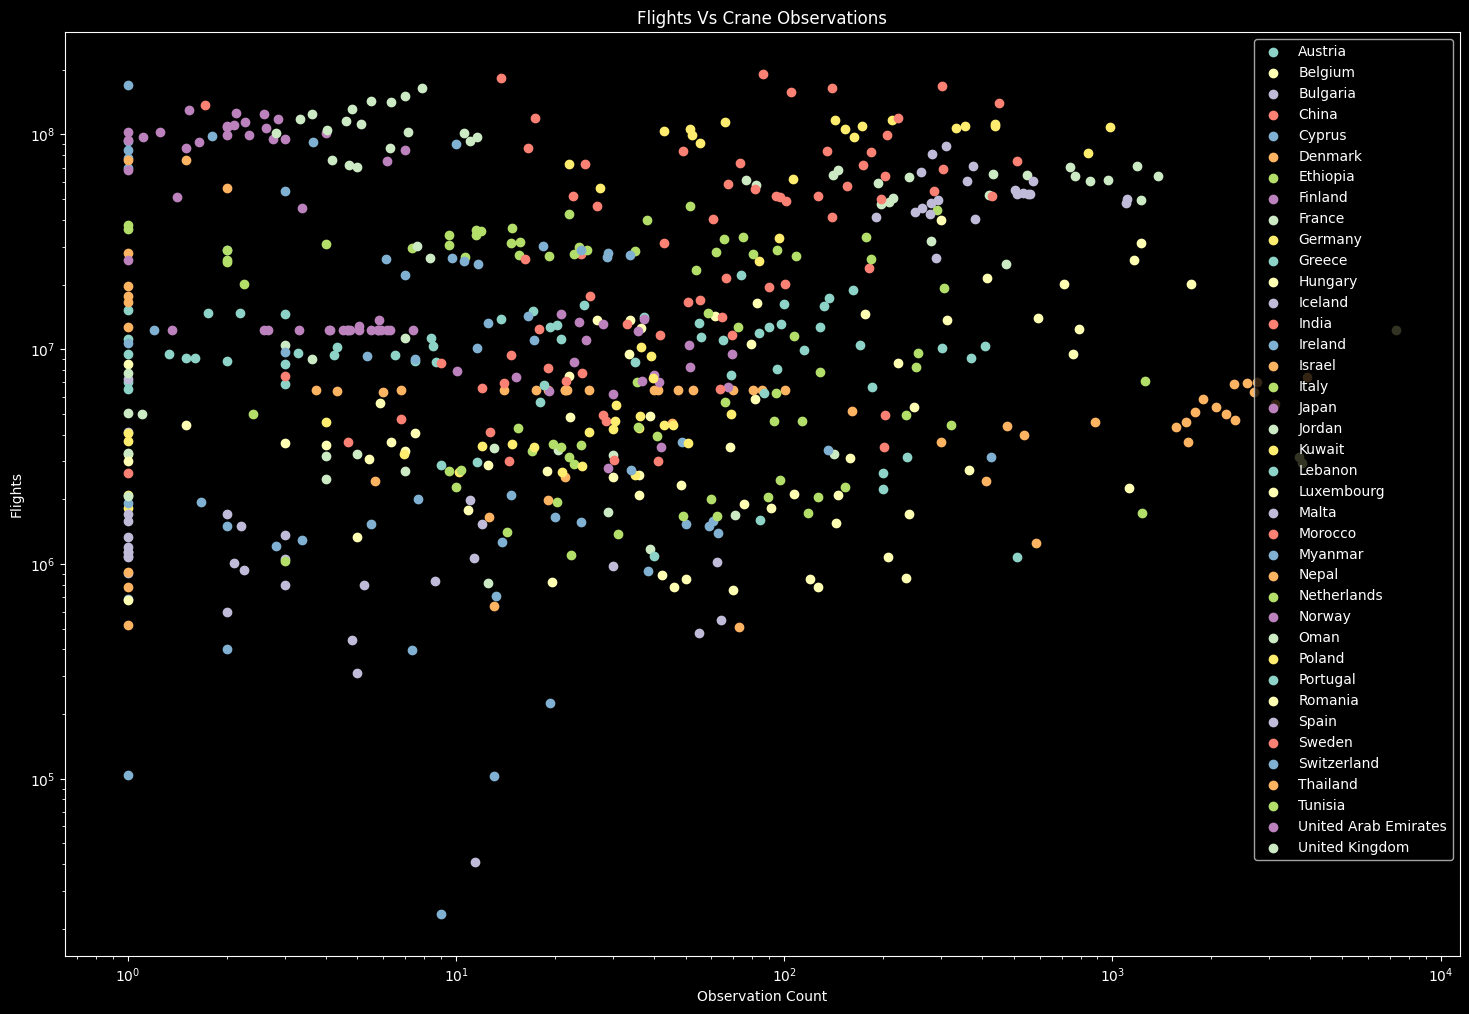

In [52]:
zscore = 3
upper_o = flightcranedata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").mean()+zscore*flightcranedata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").std()
lower_o = flightcranedata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").mean()-zscore*flightcranedata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").std()
upper_f = flightcranedata[["COUNTRY","Flights"]].groupby("COUNTRY").mean()+zscore*flightcranedata[["COUNTRY","Flights"]].groupby("COUNTRY").std()
lower_f = flightcranedata[["COUNTRY","Flights"]].groupby("COUNTRY").mean()-zscore*flightcranedata[["COUNTRY","Flights"]].groupby("COUNTRY").std()

corr = []

plt.figure(figsize=(18,12))
plt.xscale("log")
plt.yscale("log")

countrylist = flightcranedata.reset_index()["COUNTRY"].unique()

#countrylist = ["Canada"]

for i in countrylist:
    correlationfig = corrs[corrs["Country"]==i]["Correlation"]
    plt.title("Flights Vs Crane Observations")
    plt.xlabel("Observation Count")
    plt.ylabel("Flights")

    temp = flightcranedata[(flightcranedata["COUNTRY"]==i) &
    (flightcranedata["OBSERVATION COUNT"]<=upper_o["OBSERVATION COUNT"][i]) &
    (flightcranedata["OBSERVATION COUNT"]>=lower_o["OBSERVATION COUNT"][i]) &
    (flightcranedata["Flights"]<=upper_f["Flights"][i]) &
    (flightcranedata["Flights"]>=lower_f["Flights"][i])]

    plt.scatter(temp["OBSERVATION COUNT"],temp["Flights"])
plt.legend(flightcranedata.reset_index()["COUNTRY"].unique())

C:\Users\prabr\AppData\Local\Temp\ipykernel_23980\2598160151.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = (flightcranedata.groupby(pd.cut(flightcranedata['Flights'], list(range(int(flightcranedata["Flights"].min()),int(flightcranedata["Flights"].max()),30000000)))).sum()).drop(columns="Flights").reset_index()


Text(0.5, 1.0, 'Crane Count vs Number of Flights')

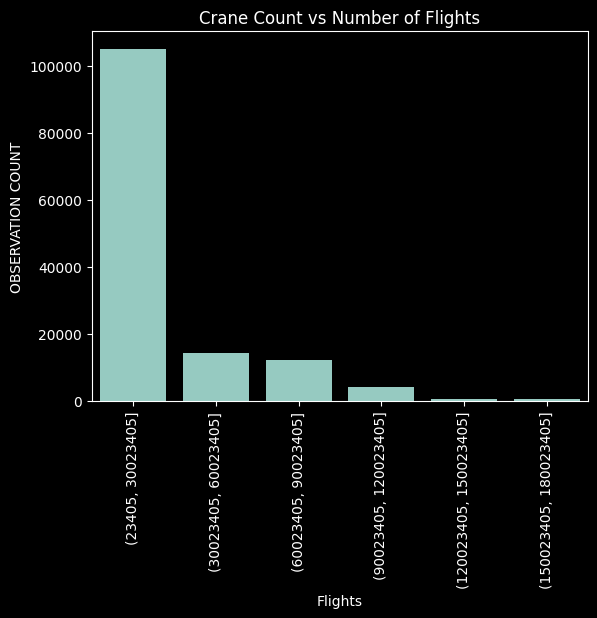

In [82]:
grouped = (flightcranedata.groupby(pd.cut(flightcranedata['Flights'], list(range(int(flightcranedata["Flights"].min()),int(flightcranedata["Flights"].max()),30000000)))).sum()).drop(columns="Flights").reset_index()

sns.barplot(data=grouped,x="Flights",y="OBSERVATION COUNT")
plt.xticks(rotation=90)
plt.title("Crane Count vs Number of Flights")

Higher flight numbers see less birds

Text(0.5, 0, 'Year')

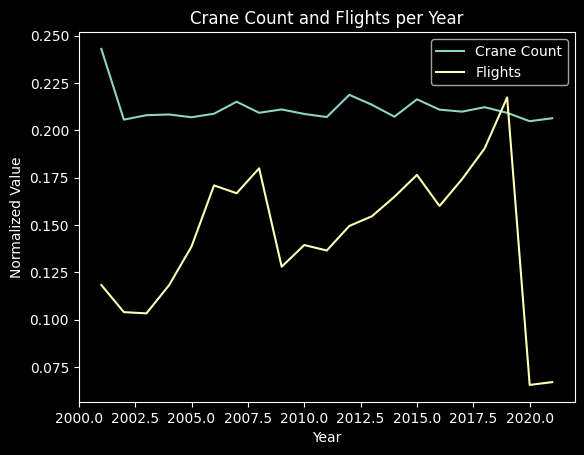

In [54]:
plt.plot(flightcranedata.groupby("OBSERVATION DATE").mean(numeric_only=True)["OBSERVATION COUNT"]/flightcranedata["OBSERVATION COUNT"].max()+0.2,label = "Crane Count")
plt.plot(flightcranedata.groupby("OBSERVATION DATE").mean(numeric_only=True)["Flights"]/flightcranedata["Flights"].max(),label = "Flights")
plt.legend()
plt.title("Crane Count and Flights per Year")
plt.ylabel("Normalized Value")
plt.xlabel("Year")

<h3>TURBINE DATA - COUNT


Need to work out bird population within proximity of the wind turbines

Compare to the bird population when the bird turbine was not there

In [55]:
cranedata_total=cranedata_total[cranedata_total["OBSERVATION DATE"]>LOWERBOUNDYEAR]

In [56]:
cranedata_total.reset_index()["OBSERVATION DATE"].max(),cranedata_total.reset_index()["OBSERVATION DATE"].min()

(np.int32(2024), np.int32(2001))

In [57]:
turbinedata = turbinedata[(turbinedata["Start Year"]<=2024) & (turbinedata["Start Year"]>=LOWERBOUNDYEAR)]

Make the time ranges the same


In [58]:
turbinedata["Start Year"] = turbinedata["Start Year"].astype("int")

In [59]:
turbinedata=turbinedata[turbinedata["Status"]=="Operating"].drop(columns="Status")
turbinedata.head()

,Capacity (MW),Start Year,Latitude,Longitude
0,10.0,2014,28.4624,-0.0576
6,240.0,2018,25.8577,34.4182
7,220.0,2018,25.8577,34.4182
8,120.0,2018,25.8577,34.4182
9,263.0,2019,28.4005,32.9572


Only interested in the turbines that are ready made and able to kill birds

In [60]:
cranedata_total=cranedata_total.drop(columns="COUNTRY")

In [61]:
cranedata_total.head()

,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE
7019,1,52.451825,5.370254,2001
7020,10,49.459170,8.678565,2001
7021,3,60.436609,16.452448,2001
7022,1,58.461900,15.555868,2001
7027,11,55.961874,36.237201,2001


<Figure size 640x480 with 0 Axes>

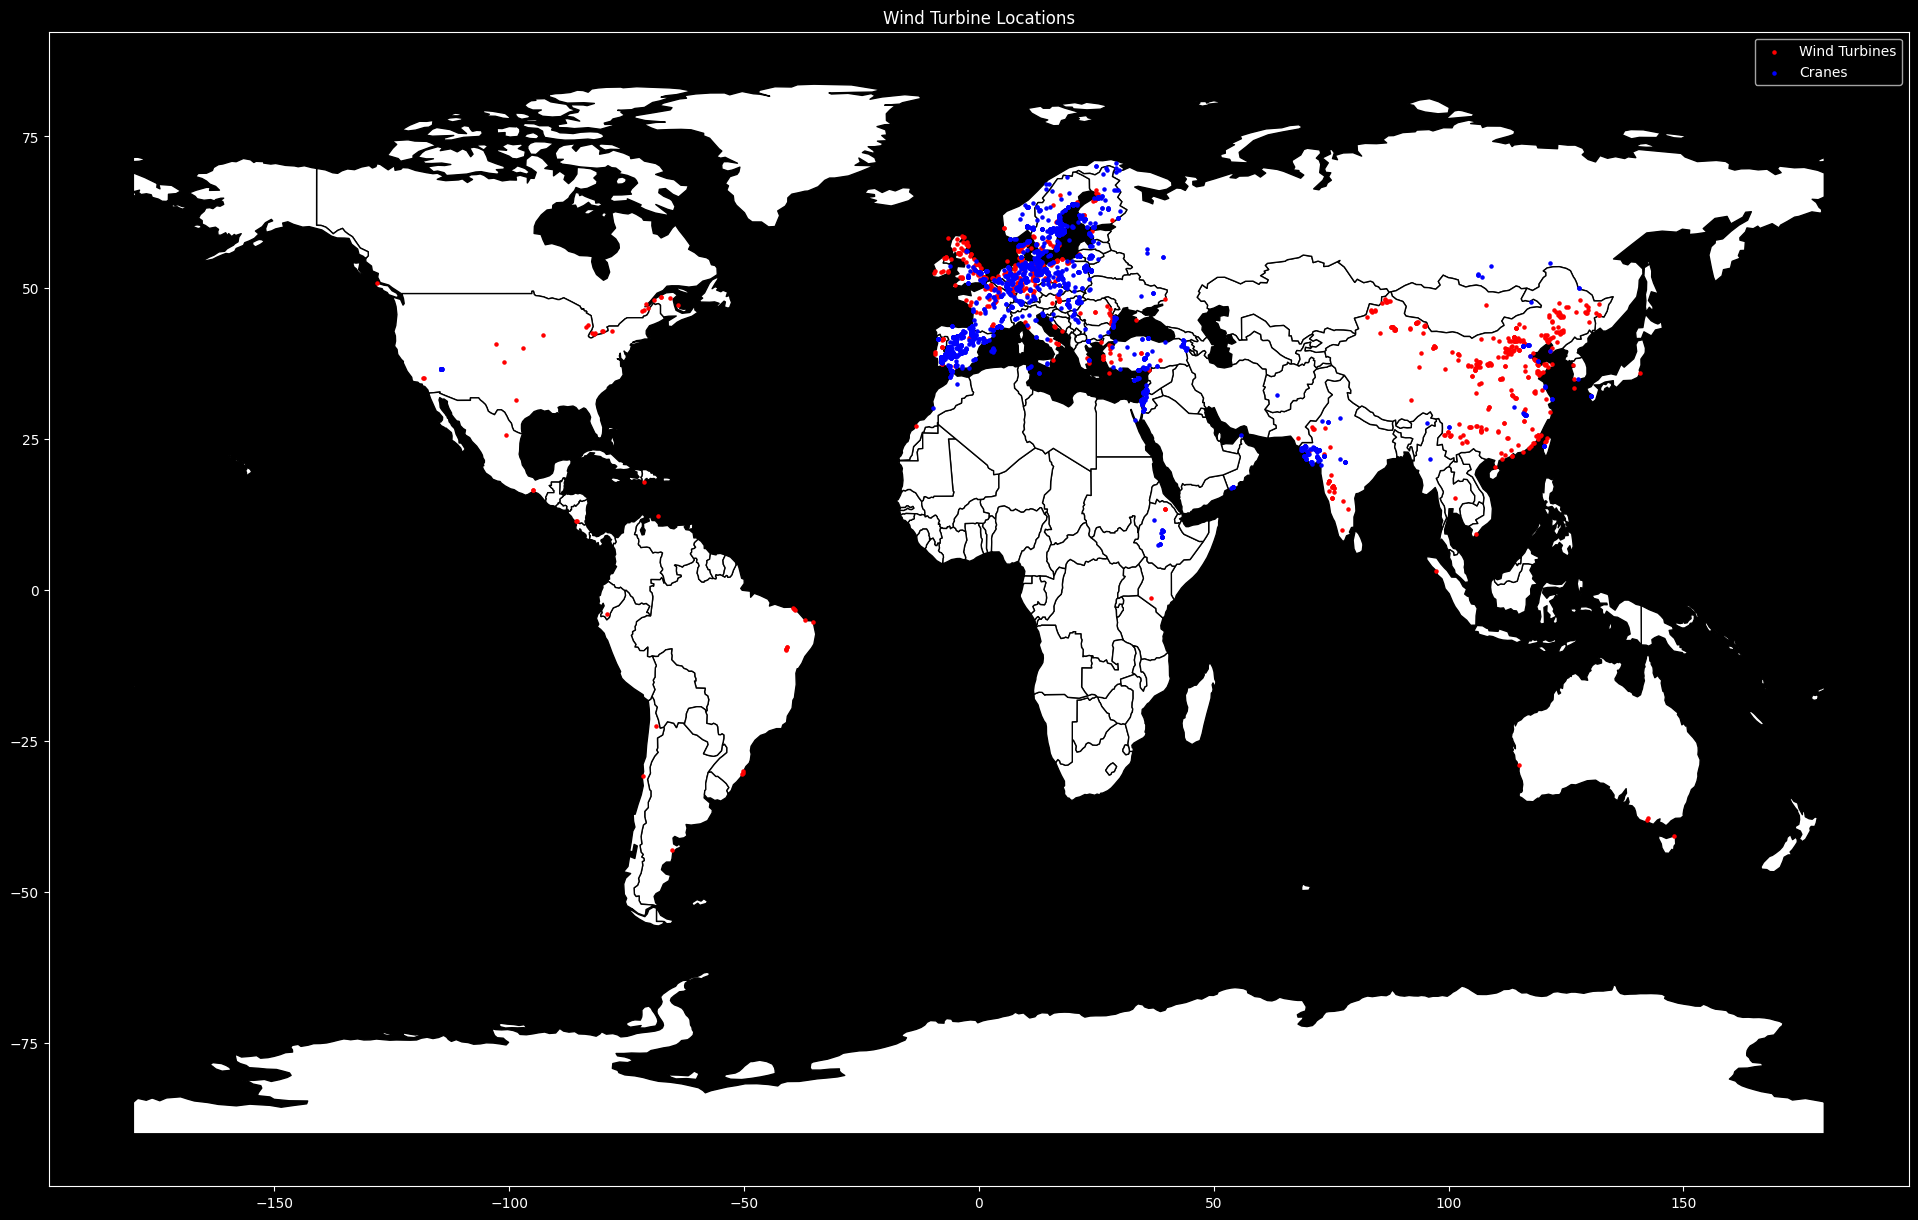

In [62]:


import geopandas as gpd
def turbinecraneplot(year):

    filtered_turbinedata = turbinedata[turbinedata["Start Year"]==year]
    filtered_cranedata_total = cranedata_total[cranedata_total["OBSERVATION DATE"]==year]

    plt.figure()
    url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

    world = gpd.read_file(url)
    ax = world.plot(color="white", edgecolor="black",figsize=(24,16))

    gdf = gpd.GeoDataFrame(filtered_turbinedata,geometry=gpd.points_from_xy(filtered_turbinedata["Longitude"],filtered_turbinedata["Latitude"], crs="EPSG:4326"))
    gdf1 = gpd.GeoDataFrame(filtered_cranedata_total,geometry=gpd.points_from_xy(filtered_cranedata_total["LONGITUDE"],filtered_cranedata_total["LATITUDE"], crs="EPSG:4326"))

    plt.title("Wind Turbine Locations")
    gdf.plot(ax=ax,color="red",markersize=5)
    gdf1.plot(ax=ax,color="blue",markersize=5)
    plt.legend(["Wind Turbines","Cranes"])
    plt.show()
    
year = 2013
"""for i in range(2015,2024):
    turbinecraneplot(i)"""
turbinecraneplot(year)

In [63]:
turbinesperyear = turbinedata.groupby("Start Year").count()[["Capacity (MW)"]].loc[1:].reset_index().set_index("Start Year").rename(columns={"Capacity (MW)":"Wind Turbine Count"})
cranedataperyear = cranedata_total.reset_index().groupby("OBSERVATION DATE").sum(numeric_only=True).reset_index().set_index("OBSERVATION DATE")

In [64]:
turbinecraneperyear = turbinesperyear.join(cranedataperyear,on="Start Year").reset_index().dropna().drop(columns="index")
turbinecraneperyear.head()

,Start Year,Wind Turbine Count,OBSERVATION COUNT,LATITUDE,LONGITUDE
1,2001,141,219071.0,21327.108184,7139.785930
2,2002,161,119206.0,21112.796597,6831.512844
3,2003,201,109055.0,26261.596155,8418.156159
4,2004,176,117024.0,32491.811061,12512.550320
5,2005,245,174274.0,33057.577984,15248.818847


Correlation =  0.31986683108317965


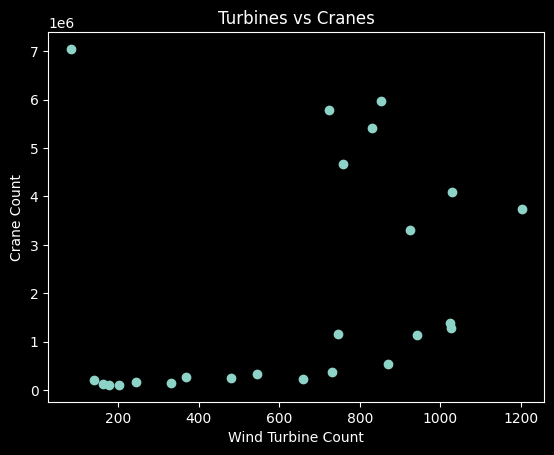

In [65]:
plt.title("Turbines vs Cranes")
plt.scatter(data=turbinecraneperyear,x="Wind Turbine Count",y="OBSERVATION COUNT")
plt.xlabel("Wind Turbine Count")
plt.ylabel("Crane Count")
print("Correlation = ",turbinecraneperyear[["Wind Turbine Count","OBSERVATION COUNT"]].corr().iloc[1,0])

Overall thorughout all data, theres no correlation

Correlation =  -0.9096530327281249


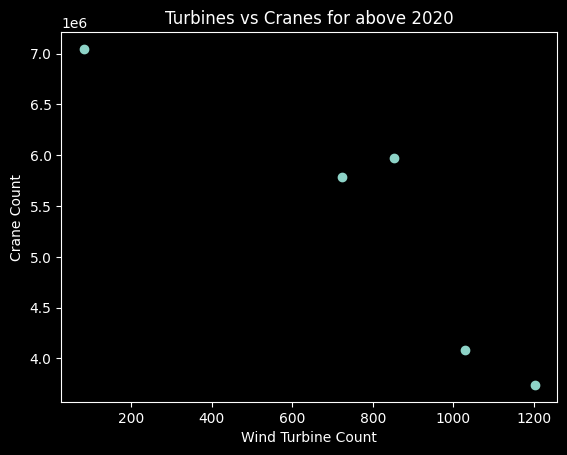

In [66]:
turbinecraneperyear_recent = turbinecraneperyear[turbinecraneperyear["Start Year"]>=2020]
plt.title("Turbines vs Cranes for above 2020")
plt.scatter(data=turbinecraneperyear_recent,x="Wind Turbine Count",y="OBSERVATION COUNT")
plt.xlabel("Wind Turbine Count")
plt.ylabel("Crane Count")
print("Correlation = ",turbinecraneperyear_recent[["Wind Turbine Count","OBSERVATION COUNT"]].corr().iloc[1,0])

However past 2020, more turbines have meant less cranes

In [67]:
turbinecraneperyear_diff = turbinecraneperyear[["Start Year","Wind Turbine Count","OBSERVATION COUNT"]].diff().drop(columns="Start Year").dropna()
(turbinecraneperyear_diff["OBSERVATION COUNT"]/turbinecraneperyear_diff["Wind Turbine Count"]).mean()


np.float64(-6927.283753468274)

,Start Year,Wind Turbine Count,OBSERVATION COUNT,LATITUDE,LONGITUDE
19,2019,831,5408218.0,742755.91682,291927.311776


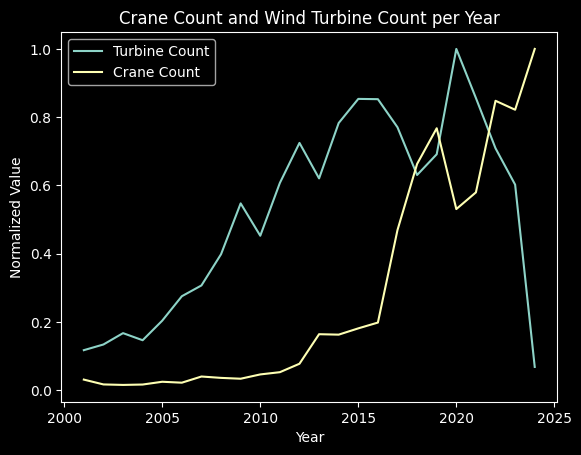

In [68]:
plt.plot(turbinecraneperyear.set_index("Start Year")["Wind Turbine Count"]/turbinecraneperyear.set_index("Start Year")["Wind Turbine Count"].max(),label="Turbine Count")
plt.plot(turbinecraneperyear.set_index("Start Year")["OBSERVATION COUNT"]/turbinecraneperyear.set_index("Start Year")["OBSERVATION COUNT"].max(),label="Crane Count")
plt.legend()
plt.title("Crane Count and Wind Turbine Count per Year")
plt.xlabel("Year")
plt.ylabel("Normalized Value")

turbinecraneperyear[turbinecraneperyear["Start Year"]==2019]

<h3>TURBINE COUNT - PROXIMITY

In [69]:
from IPython.display import display

cranedata_total_sorted = cranedata_total.sort_values(["LATITUDE","LONGITUDE"])
display(cranedata_total_sorted.head()),display(cranedata_total_sorted.tail())

,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE
26483,15,5.280000,39.683100,2014
11371,5,5.779946,36.536098,2006
41143,1,6.859025,39.807003,2017
10662,15,7.053070,38.427628,2006
26607,1,7.057086,38.469439,2014


,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE
189290,9,70.660787,26.574639,2023
110038,3,70.665841,26.586079,2021
29187,2,71.089472,28.218339,2015
185069,1,78.198400,15.839700,2023
210960,1,78.198400,15.839700,2023


(None, None)

In [70]:
turbinedata_sorted = turbinedata.sort_values(["Latitude","Longitude"])
display(turbinedata_sorted.head()),display(turbinedata_sorted.tail())

,Capacity (MW),Start Year,Latitude,Longitude
1405,10.0,2020,-52.9361,-70.8288
181,101.0,2019,-47.2995,-66.9931
182,25.0,2019,-47.2995,-66.9931
209,97.0,2021,-46.6343,-68.3925
184,122.0,2021,-46.5925,-67.6486


,Capacity (MW),Start Year,Latitude,Longitude
12500,54.0,2012,70.1006,20.1058
12508,52.0,2017,70.6679,29.7190
12542,45.0,2014,70.7657,29.0833
12543,52.0,2022,70.7657,29.0833
12522,39.0,2006,70.9185,27.2899


(None, None)

Range will be (25,39) to (70,28)

In [71]:
csort = cranedata_total_sorted[(cranedata_total_sorted["LATITUDE"]>25) & (cranedata_total_sorted["LATITUDE"]<70)
& (cranedata_total_sorted["LONGITUDE"]<39) & (cranedata_total_sorted["LONGITUDE"]>28)]

In [72]:
tsort = turbinedata_sorted[(turbinedata_sorted["Latitude"]>25) & (turbinedata_sorted["Latitude"]<70)
& (turbinedata_sorted["Longitude"]<39) & (turbinedata_sorted["Longitude"]>28)]

Merge on latitude as theres more variation

In [73]:
import numpy as np

locdata = pd.merge_asof(csort,tsort,direction="nearest",left_on="LATITUDE",right_on="Latitude") #paired by location

#locdata=locdata.drop(columns=["LATITUDE","LONGITUDE","Latitude","Longitude"])

locdata = locdata[locdata["OBSERVATION DATE"]>locdata["Start Year"]]
locdata["Distance"] = np.sqrt((locdata["LONGITUDE"]-locdata["Longitude"])**2+((locdata["LATITUDE"]-locdata["Latitude"]))**2) #defines distance from turbine
locdata
locdata = locdata.drop(columns=["LATITUDE","LONGITUDE","Latitude","Longitude"])
locdata = locdata[(locdata["OBSERVATION COUNT"]>25)] #remove small and mega large observations that skew data
locdata = locdata[(locdata["OBSERVATION COUNT"]<1000)]
locdata

,OBSERVATION COUNT,OBSERVATION DATE,Capacity (MW),Start Year,Distance
3,200,2024,240.0,2018,0.724286
7,40,2024,240.0,2018,0.348426
11,54,2022,120.0,2018,2.055832
20,257,2022,120.0,2018,1.243384
28,55,2022,252.0,2021,1.019088
...,...,...,...,...,...
15593,55,2024,201.0,2022,5.074597
15594,55,2024,201.0,2022,5.074597
15595,50,2024,201.0,2022,5.074597
15597,50,2024,201.0,2022,5.074597


Text(0.5, 1.0, 'Count vs Distance')

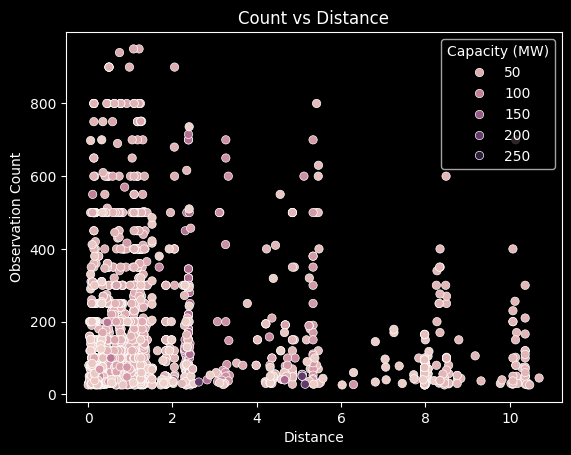

In [74]:
import seaborn as sns

sns.scatterplot(x=locdata["Distance"],y=locdata["OBSERVATION COUNT"],hue=locdata["Capacity (MW)"])
plt.xlabel("Distance")
plt.ylabel("Observation Count")
plt.title("Count vs Distance")

Text(0.5, 1.0, 'Count vs Distance for large fans')

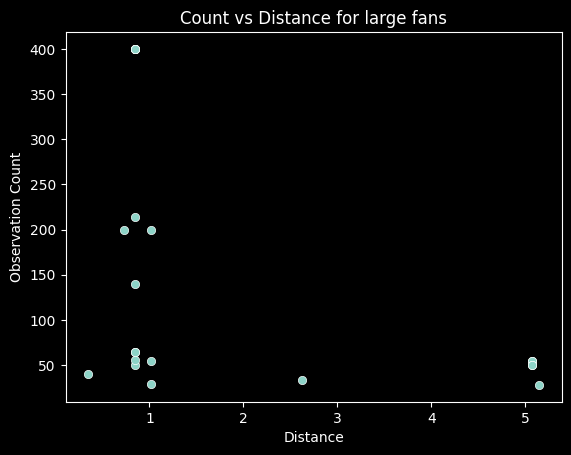

In [75]:
sns.scatterplot(x=locdata[locdata["Capacity (MW)"]>200]["Distance"],y=locdata[locdata["Capacity (MW)"]>200]["OBSERVATION COUNT"])
plt.xlabel("Distance")
plt.ylabel("Observation Count")
plt.title("Count vs Distance for large fans")

Text(0.5, 1.0, 'Count vs Distance')

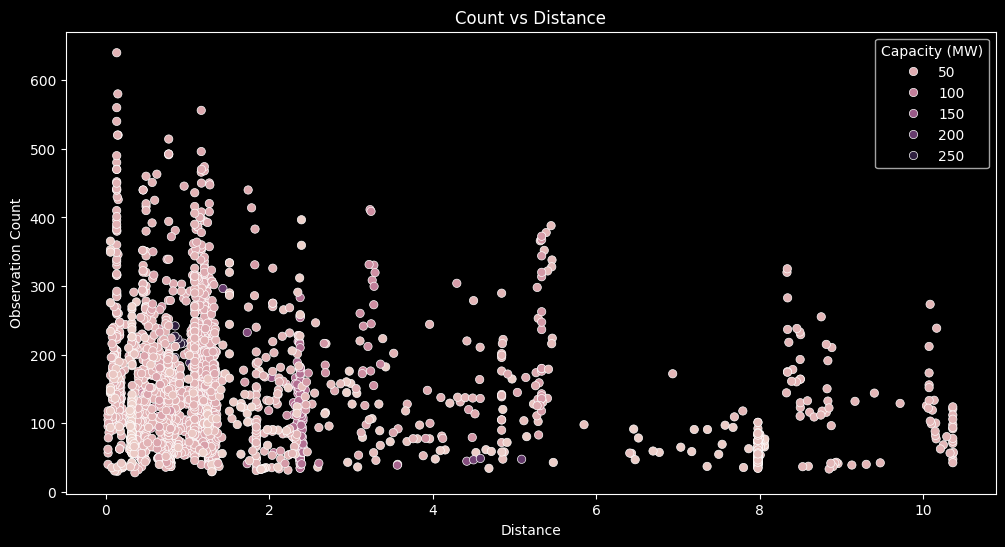

In [76]:
import seaborn as sns
smoothing = 5

plt.figure(figsize=(12,6))
sns.scatterplot(x=locdata["Distance"].rolling(smoothing).mean(),y=locdata["OBSERVATION COUNT"].rolling(smoothing).mean(),hue=locdata["Capacity (MW)"].rolling(smoothing).mean())
plt.xlabel("Distance")
plt.ylabel("Observation Count")
plt.title("Count vs Distance")
#plt.axis([0,1.5,0,400])

In [77]:
locdata.groupby("Distance").sum(numeric_only=True)["OBSERVATION COUNT"].reset_index()

,Distance,OBSERVATION COUNT
0,0.002373,26
1,0.019249,33
2,0.021128,160
3,0.024333,64
4,0.027816,50
...,...,...
841,10.398611,28
842,10.429290,26
843,10.430648,30
844,10.470777,26


Text(0.5, 1.0, 'Obsevation Count Data Skew')

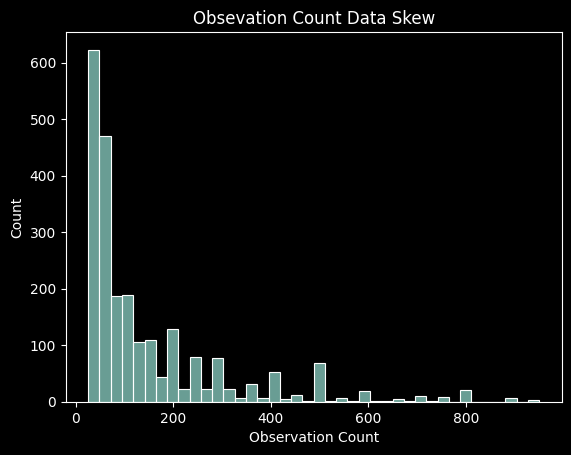

In [78]:
#sns.histplot(data=locdata[locdata["Distance"]<1.5],x="Distance",y="OBSERVATION COUNT")
sns.histplot(x=locdata["OBSERVATION COUNT"])
plt.xlabel("Data Point Count")
plt.xlabel("Observation Count")
plt.title("Obsevation Count Data Skew")

obvious data skew. need to sum each bin on a barplot to make any sense of this

C:\Users\prabr\AppData\Local\Temp\ipykernel_23980\3961700707.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = (locdata.groupby(pd.cut(locdata['Distance'], [0,1,2,3,4,5,6,7,8,9,10])).sum()).drop(columns="Distance").reset_index()


Text(0.5, 1.0, 'Crane Count vs Crane Distance')

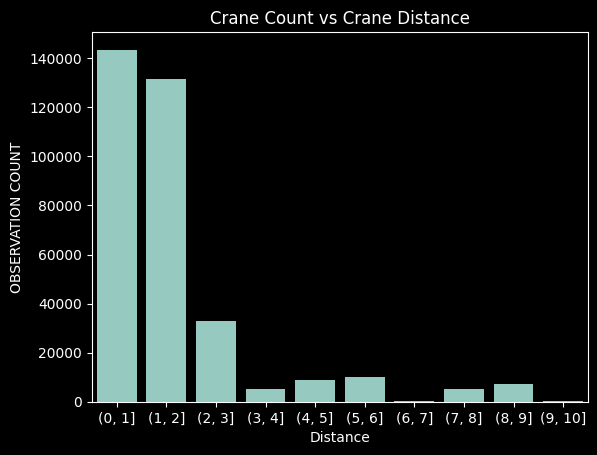

In [79]:
grouped = (locdata.groupby(pd.cut(locdata['Distance'], [0,1,2,3,4,5,6,7,8,9,10])).sum()).drop(columns="Distance").reset_index()

sns.barplot(data=grouped,x="Distance",y="OBSERVATION COUNT")
plt.title("Crane Count vs Crane Distance")

<Axes: xlabel='Distance', ylabel='OBSERVATION COUNT'>

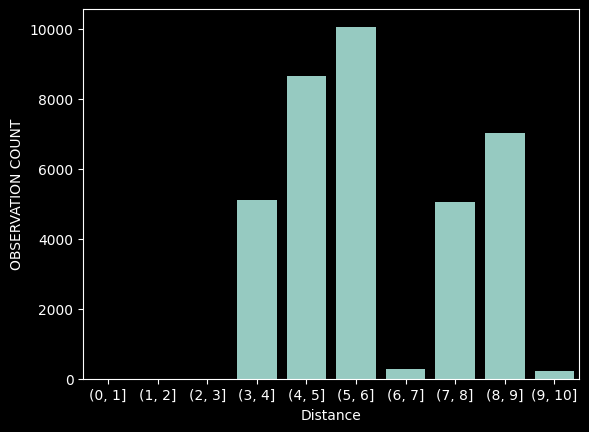

In [80]:
sns.barplot(data=grouped.drop(index=[0,1,2]),x="Distance",y="OBSERVATION COUNT")

In [81]:
locdata[["OBSERVATION COUNT","Distance"]].corr()

,OBSERVATION COUNT,Distance
OBSERVATION COUNT,1.000000,-0.100437
Distance,-0.100437,1.000000


Do correlation by country

Continue work